In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [69]:
def gen_tree_height(sample_size, samples, height_mean, height_variance):
    return np.random.normal(loc=height_mean, scale=height_variance, size=(samples, sample_size))

## Probability distribution

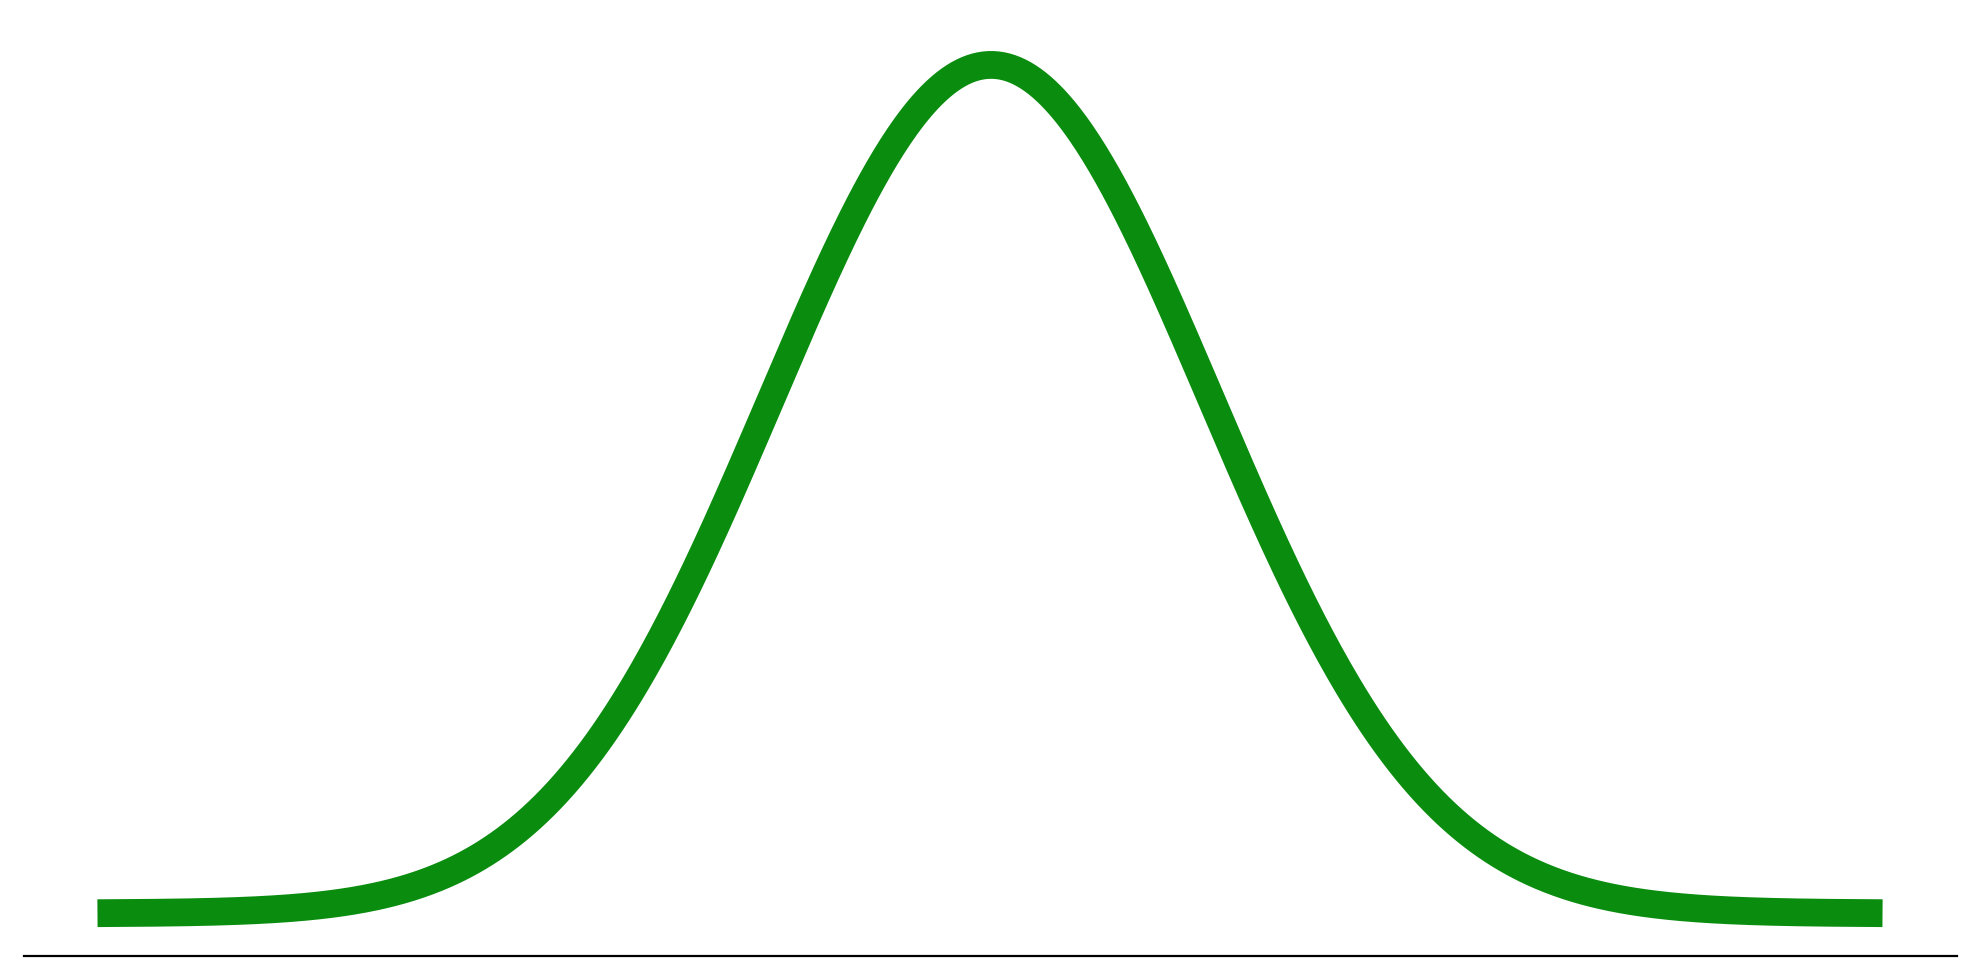

In [70]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(left=True)

x = np.arange(-4, 4, .01)
prob_x = scipy.stats.norm(0, 1).pdf(x)
color = np.array([10, 140, 15]) / 255.
plt.plot(x, prob_x, linewidth=10, color=tuple(color))
plt.yticks([])
plt.xticks([])
plt.tight_layout();


# plt.savefig("prob_dist.png", transparent=True)

## Histogram for the trees

In [85]:
sample_size = 1000
samples = 10000
height_mean = 50 
height_variance = 20 

trees_height = gen_tree_height(sample_size, samples, height_mean, height_variance)

In [86]:
sample_means = trees_height.mean(axis=1)

In [87]:
sns.set(style="white", palette="muted", color_codes=True)

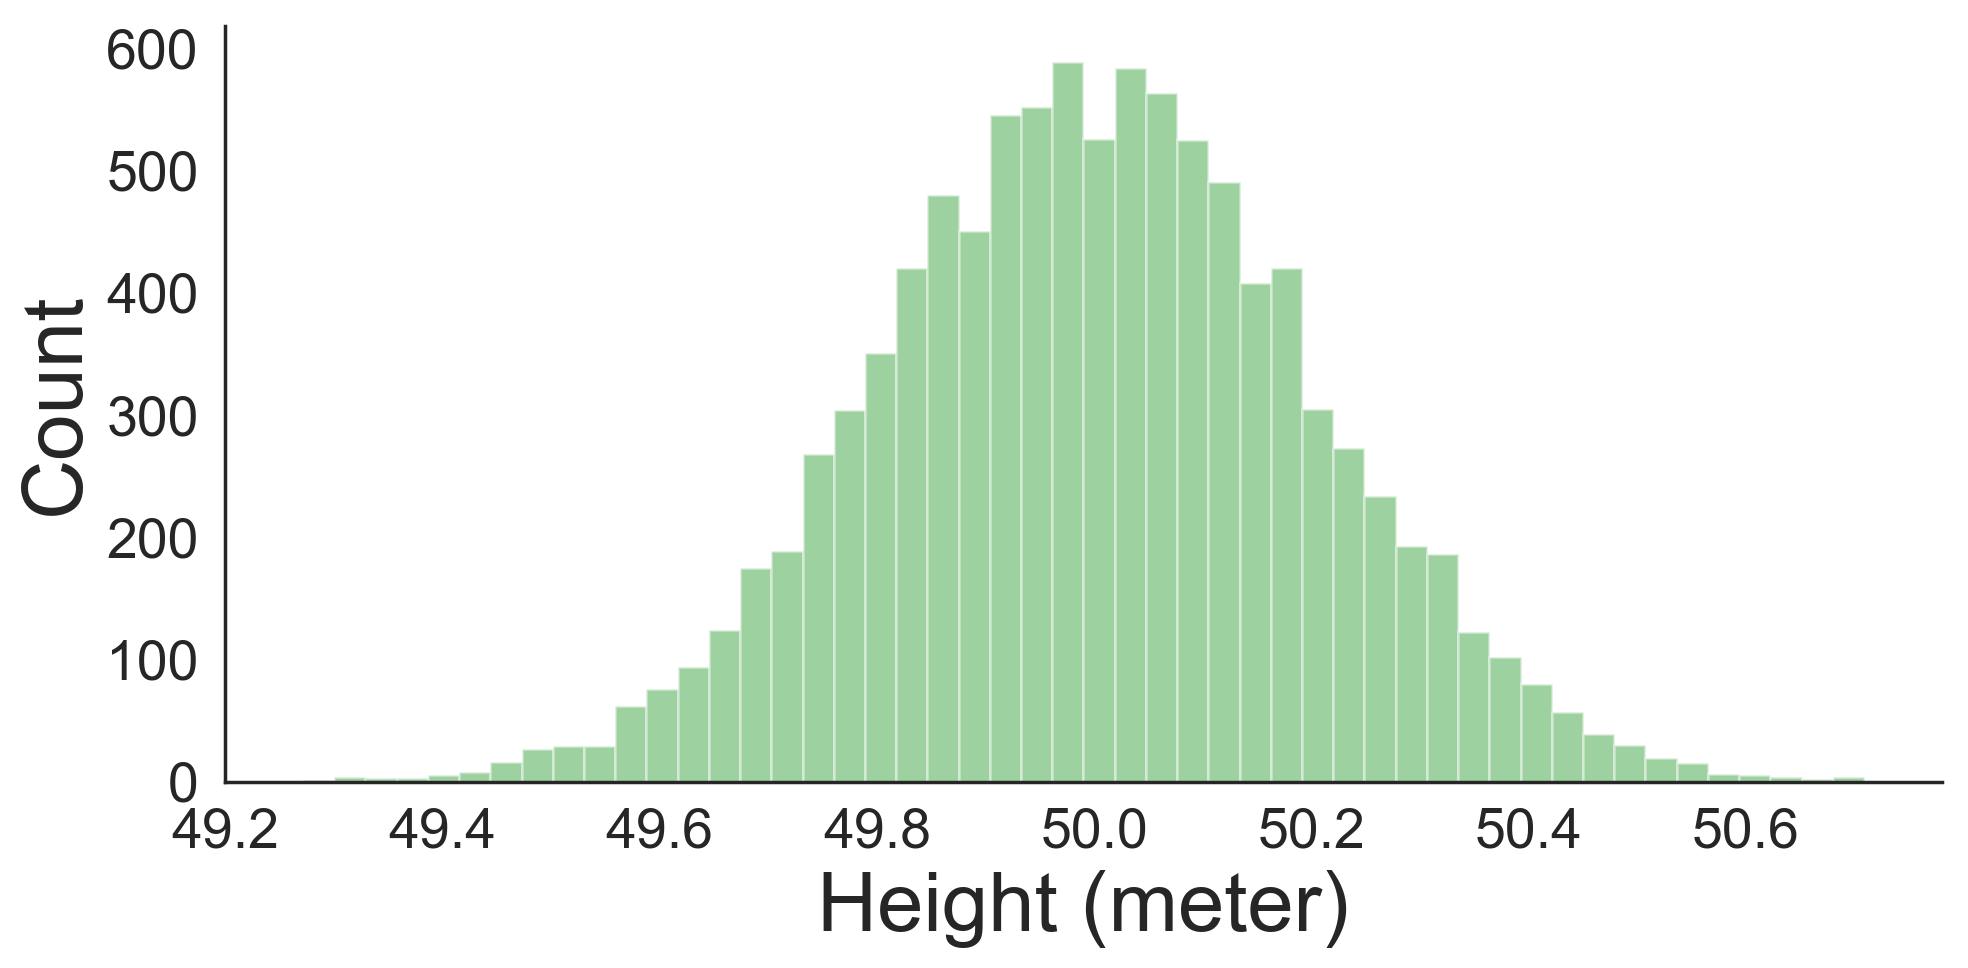

In [89]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(top=True)

color = np.array([10, 140, 15]) / 255.
# color = np.array([106, 65, 28]) / 255.
sns.distplot(tuple(sample_means), kde=False, ax=ax, bins=50, hist_kws={'color': tuple(color)})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Count', fontsize=30)
plt.xlabel('Height (meter)', fontsize=30)
plt.tight_layout();

plt.savefig("sampled_trees_hist.png", transparent=True)

## Normalized Histogram

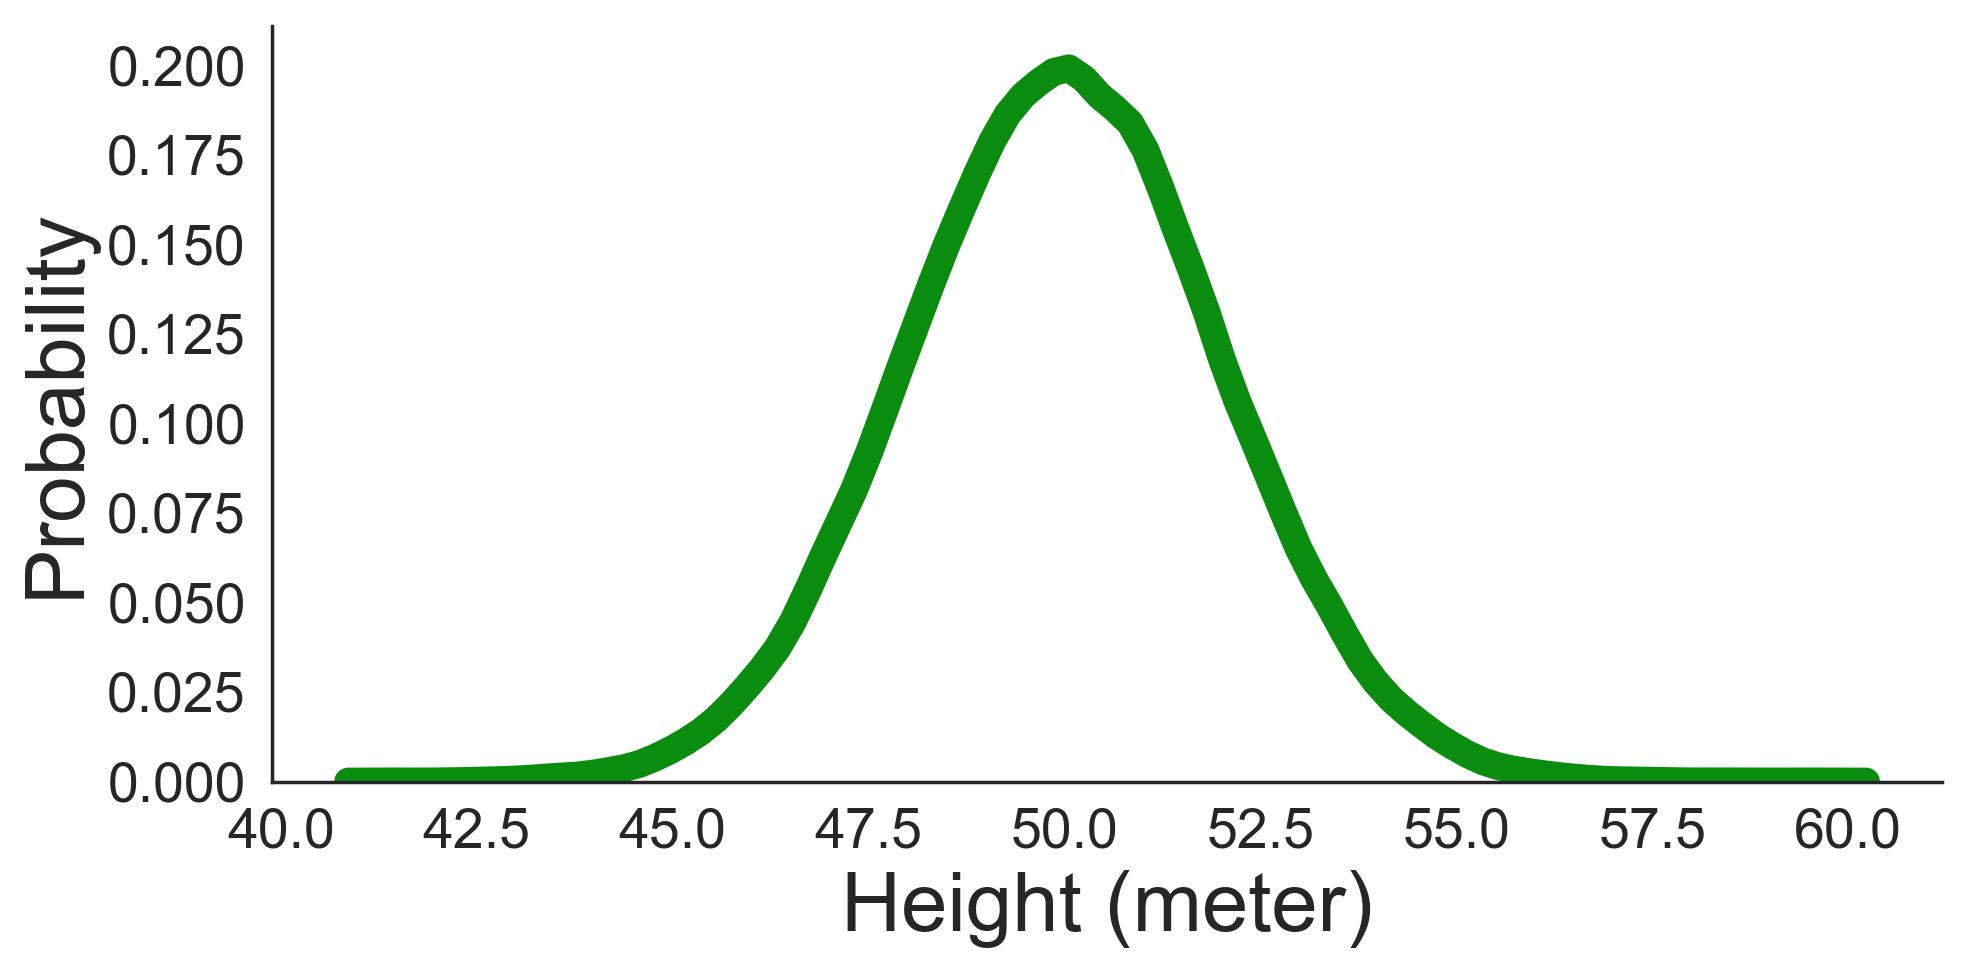

In [13]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(top=True)

color = np.array([10, 140, 15]) / 255.
sns.distplot(tuple(sample_means), ax=ax, bins=50, kde_kws={'LineWidth': 10, 'color': tuple(color)}, hist_kws={'alpha': 0})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Probability', fontsize=30)
plt.xlabel('Height (meter)', fontsize=30)
plt.tight_layout();


plt.savefig("sampled_trees_hist_normalized.png", transparent=True)

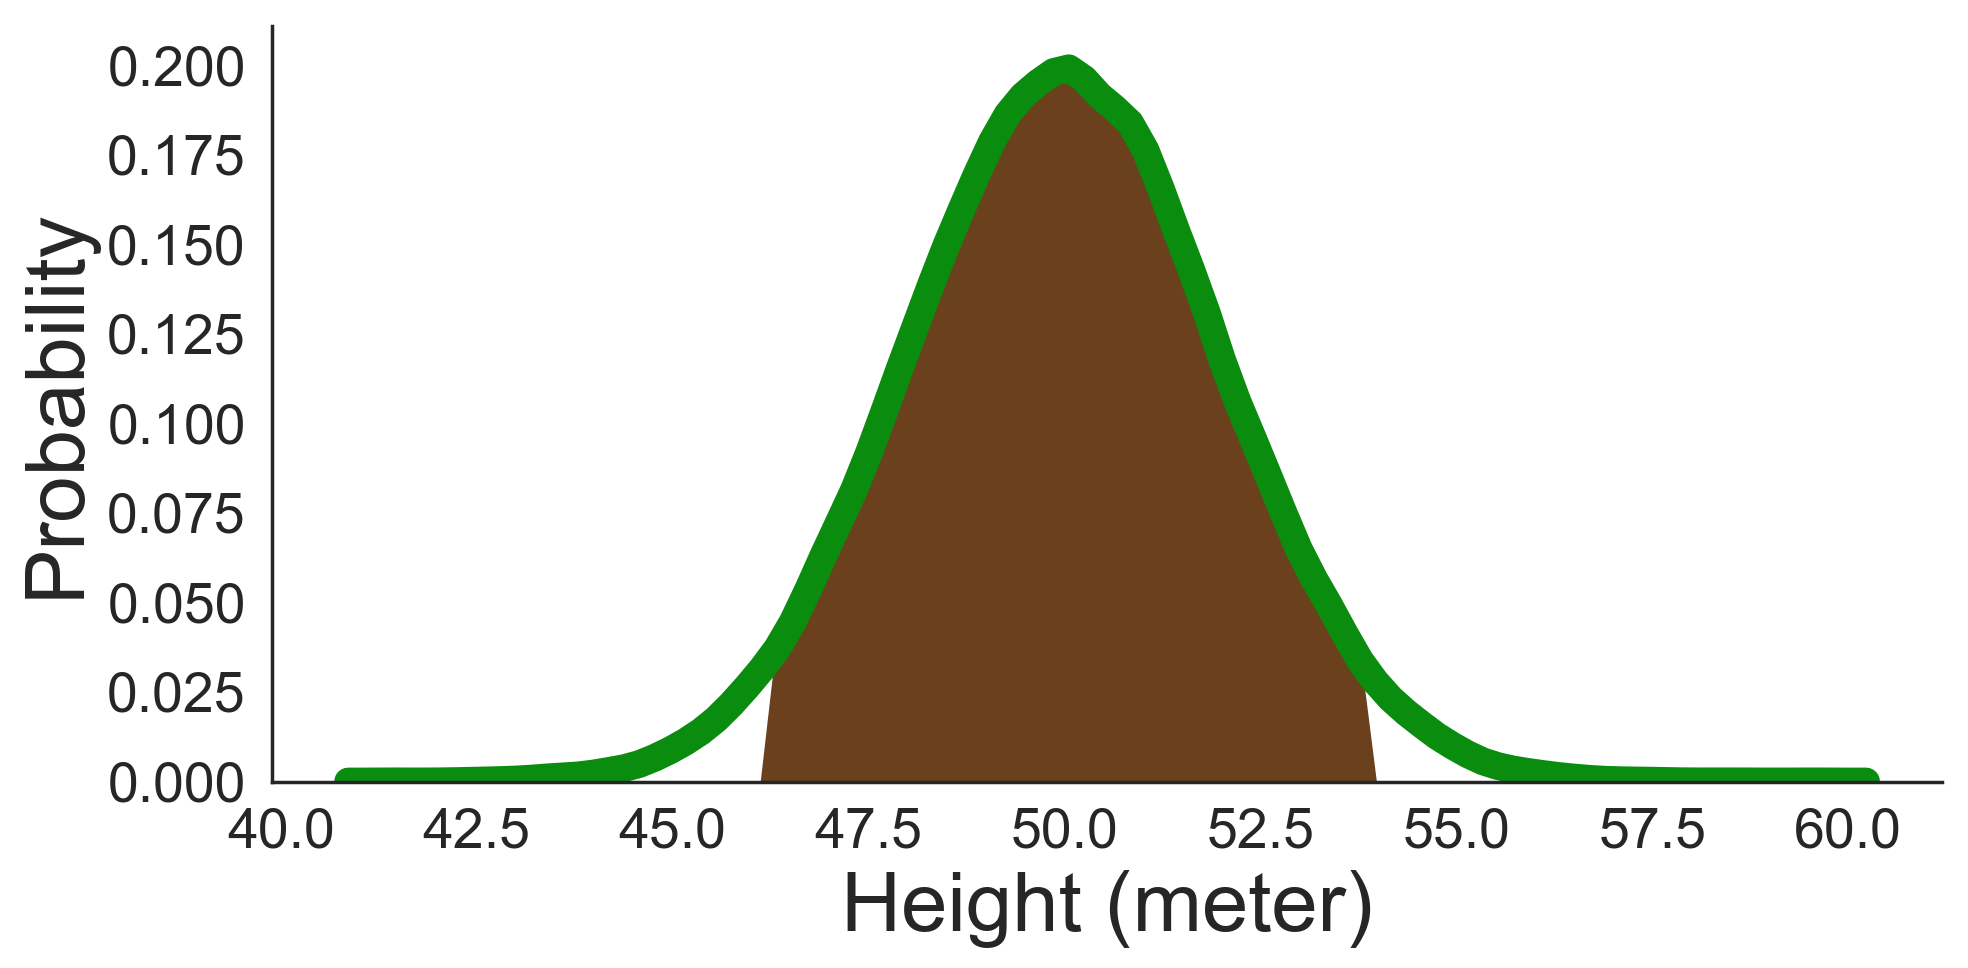

In [17]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(top=True)

color = np.array([10, 140, 15]) / 255.
sns.distplot(tuple(sample_means), ax=ax, bins=50, kde_kws={'LineWidth': 10, 'color': tuple(color)}, hist_kws={'alpha': 0})
kde_x, kde_y = ax.lines[0].get_data()

perc = .95
x_lower = np.sort(sample_means)[int((0 + (1. - perc)/2) * len(sample_means))]
x_higher = np.sort(sample_means)[int((.95 + (1. - perc)/2) * len(sample_means))]

ind_lower = 27
ind_higher = 68
kde_y[ind_lower] = 0
kde_y[ind_higher-1] = 0
color = np.array([106, 65, 28]) / 255.
plt.fill(kde_x[ind_lower:ind_higher], kde_y[ind_lower:ind_higher], color=tuple(color))

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Probability', fontsize=30)
plt.xlabel('Height (meter)', fontsize=30)
plt.tight_layout();


plt.savefig("sampled_trees_hist_normalized_95.png", transparent=True)

## MLE population normal distibution

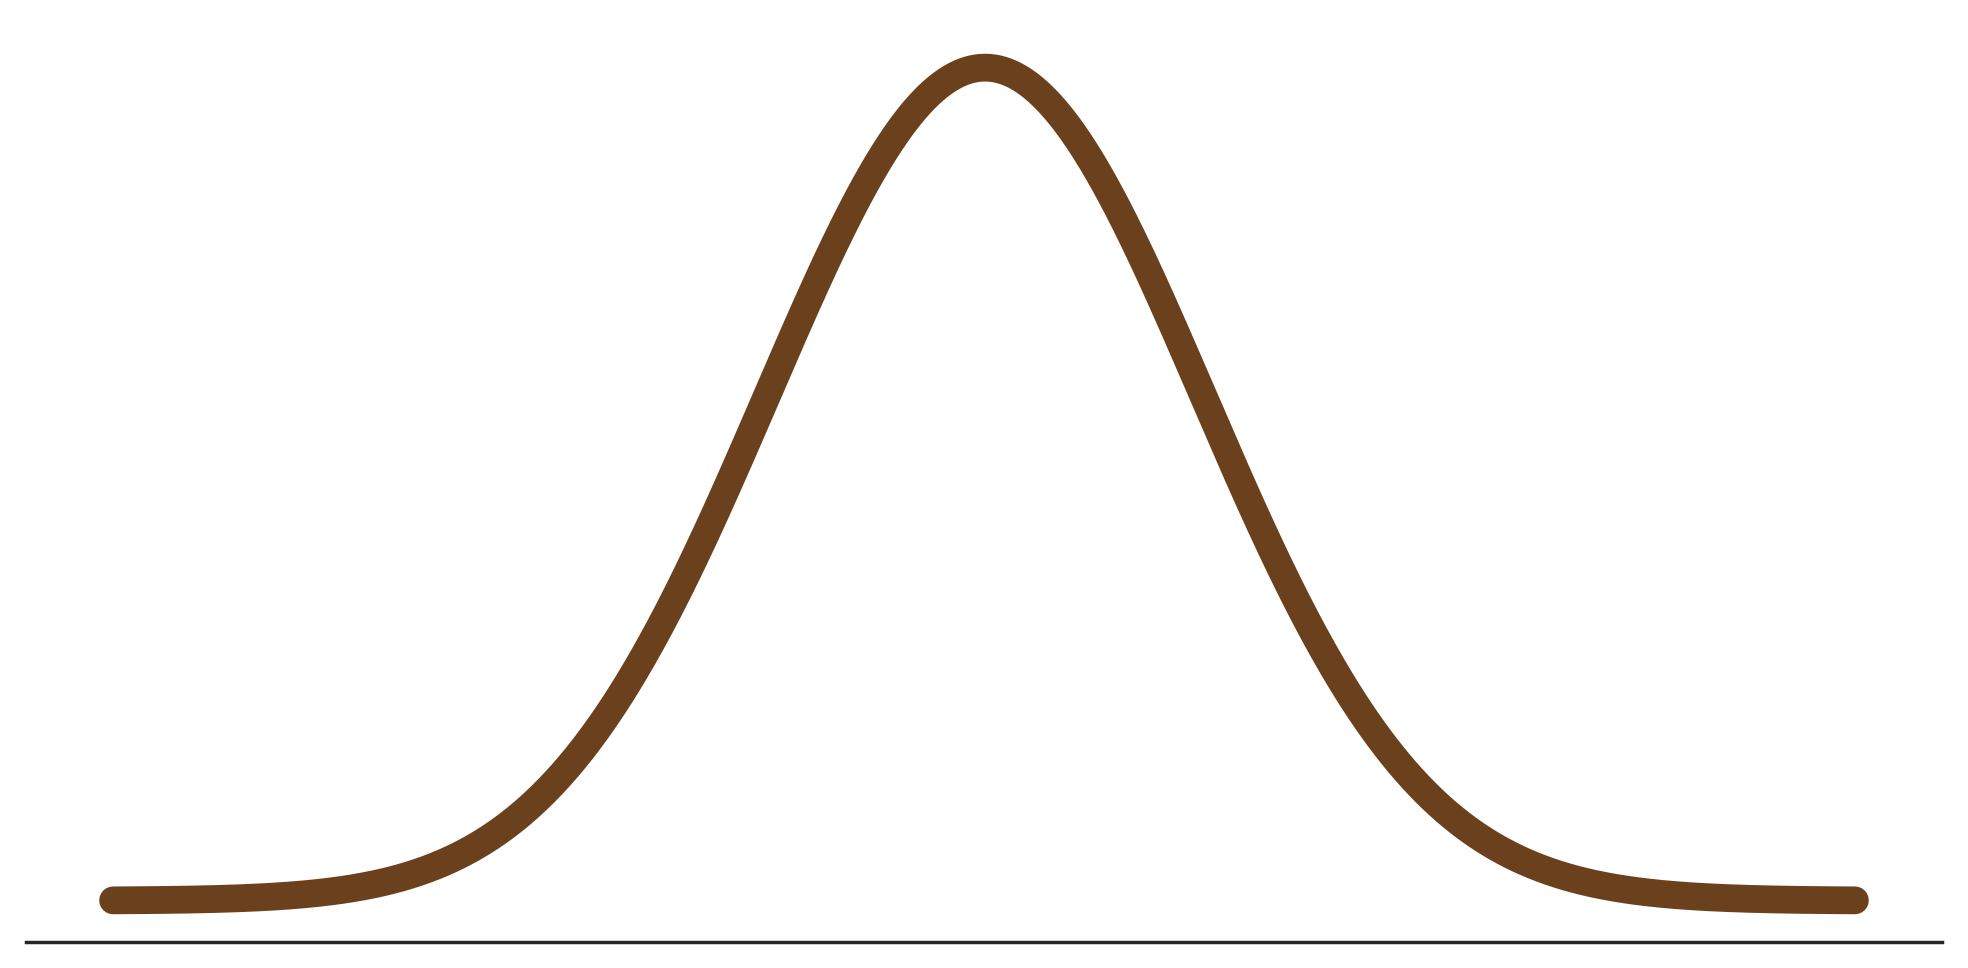

In [37]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(left=True)

x = np.arange(-4, 4, .01)
prob_x = scipy.stats.norm(0, 1).pdf(x)
color = np.array([106, 65, 28]) / 255.
plt.plot(x, prob_x, linewidth=10, color=tuple(color))
plt.yticks([])
plt.xticks([])
plt.tight_layout();


plt.savefig("MLE_population_dist.png", transparent=True)

## Maximum likelihood estimation

In [18]:
sample_size = 100
samples = 1
height_mean = 50 
height_variance = 20 

trees_height = gen_tree_height(sample_size, samples, height_mean, height_variance)

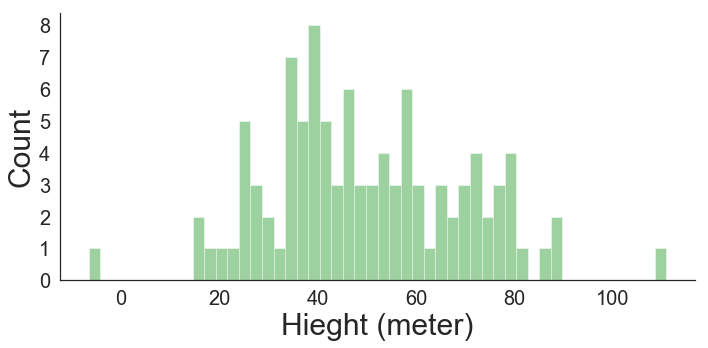

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.despine(top=True)

color = np.array([10, 140, 15]) / 255.
sns.distplot(tuple(trees_height), kde=False, ax=ax, bins=50, hist_kws={'color': tuple(color)})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Count', fontsize=30)
plt.xlabel('Hieght (meter)', fontsize=30)
plt.tight_layout();

In [21]:
# the likelihood function
def likelihood_normal(data, mean_rng, variance):
    likelihood_vals = []
    mean_vals = np.arange(*mean_rng)
    
    for mean in mean_vals:
        probs = scipy.stats.norm(mean, variance).pdf(data)
        prob = np.prod(probs)
        likelihood_vals.append(prob)
        
    return np.array(likelihood_vals), mean_vals

In [22]:
likelihoods, means = likelihood_normal(data=trees_height, mean_rng=(0, 90, .1), variance=50)

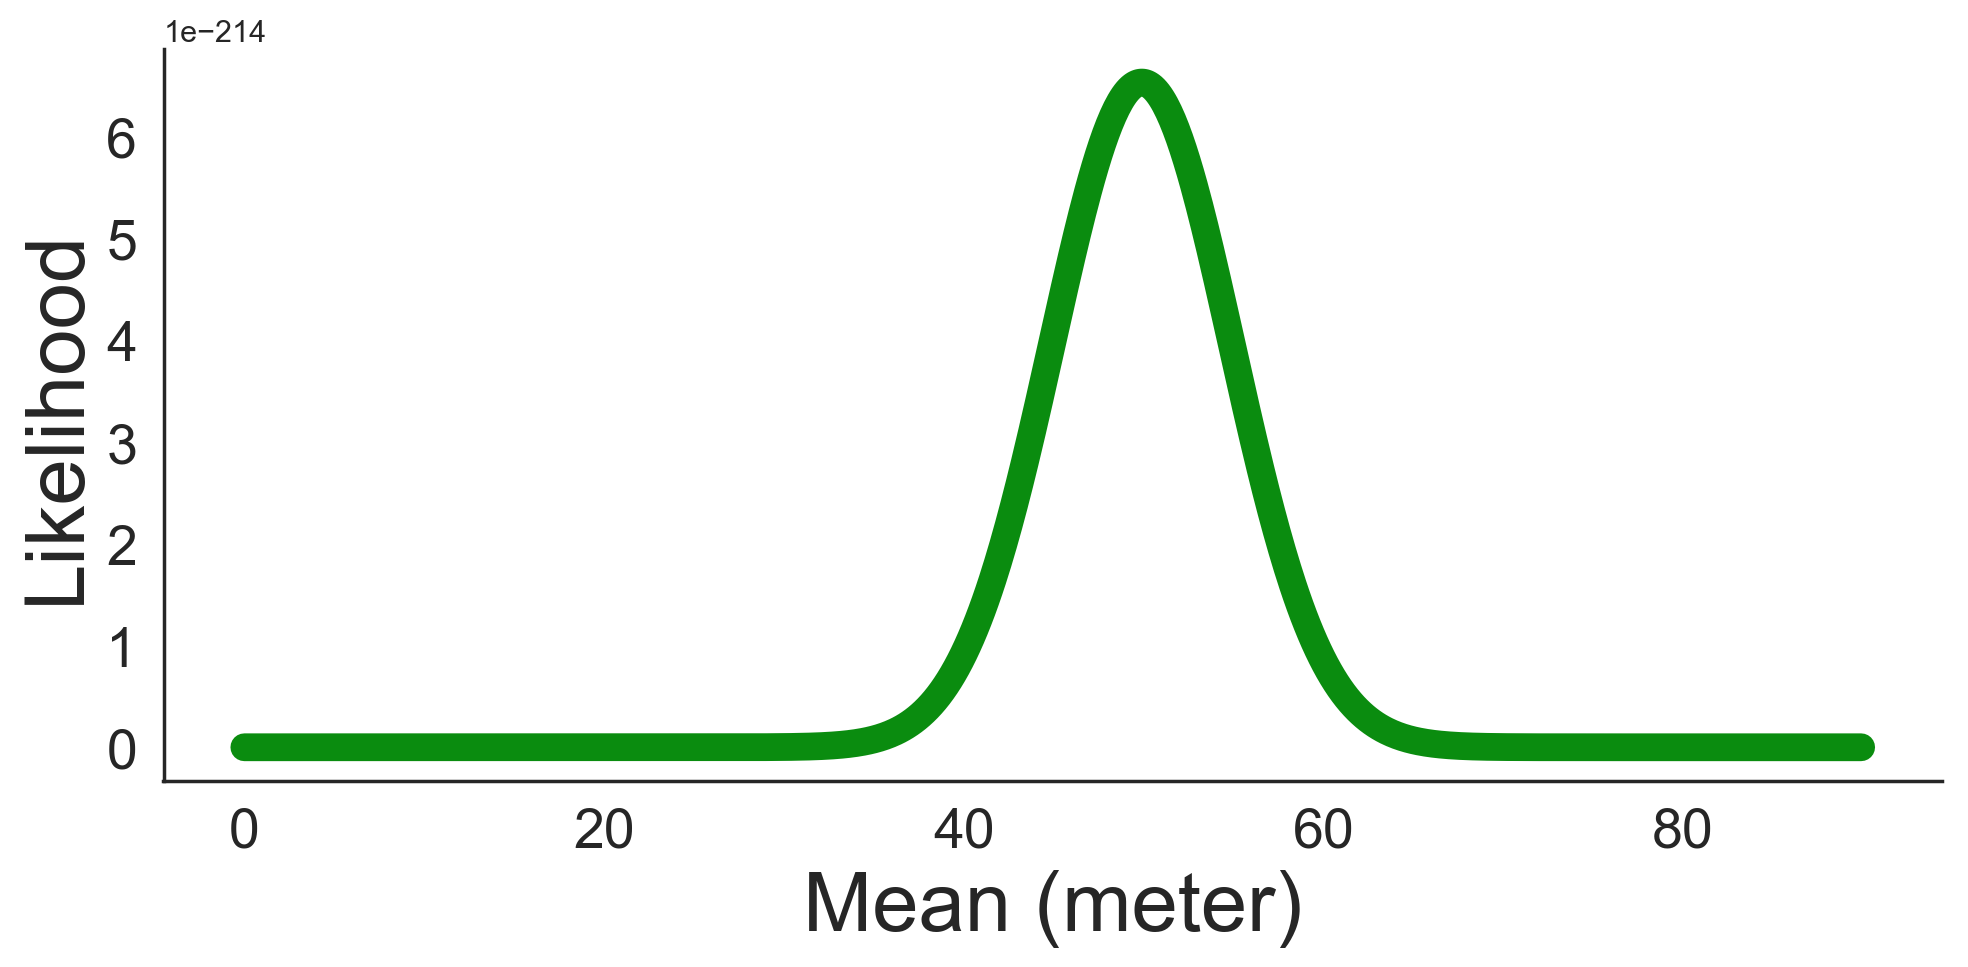

In [24]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(top=True)

color = np.array([10, 140, 15]) / 255.
plt.plot(means, likelihoods, linewidth=10, color=tuple(color))

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Likelihood', fontsize=30)
plt.xlabel('Mean (meter)', fontsize=30)
plt.tight_layout();

plt.savefig("MLE_dist.png", transparent=True)

In [25]:
means[np.argmax(likelihoods)]

49.900000000000006

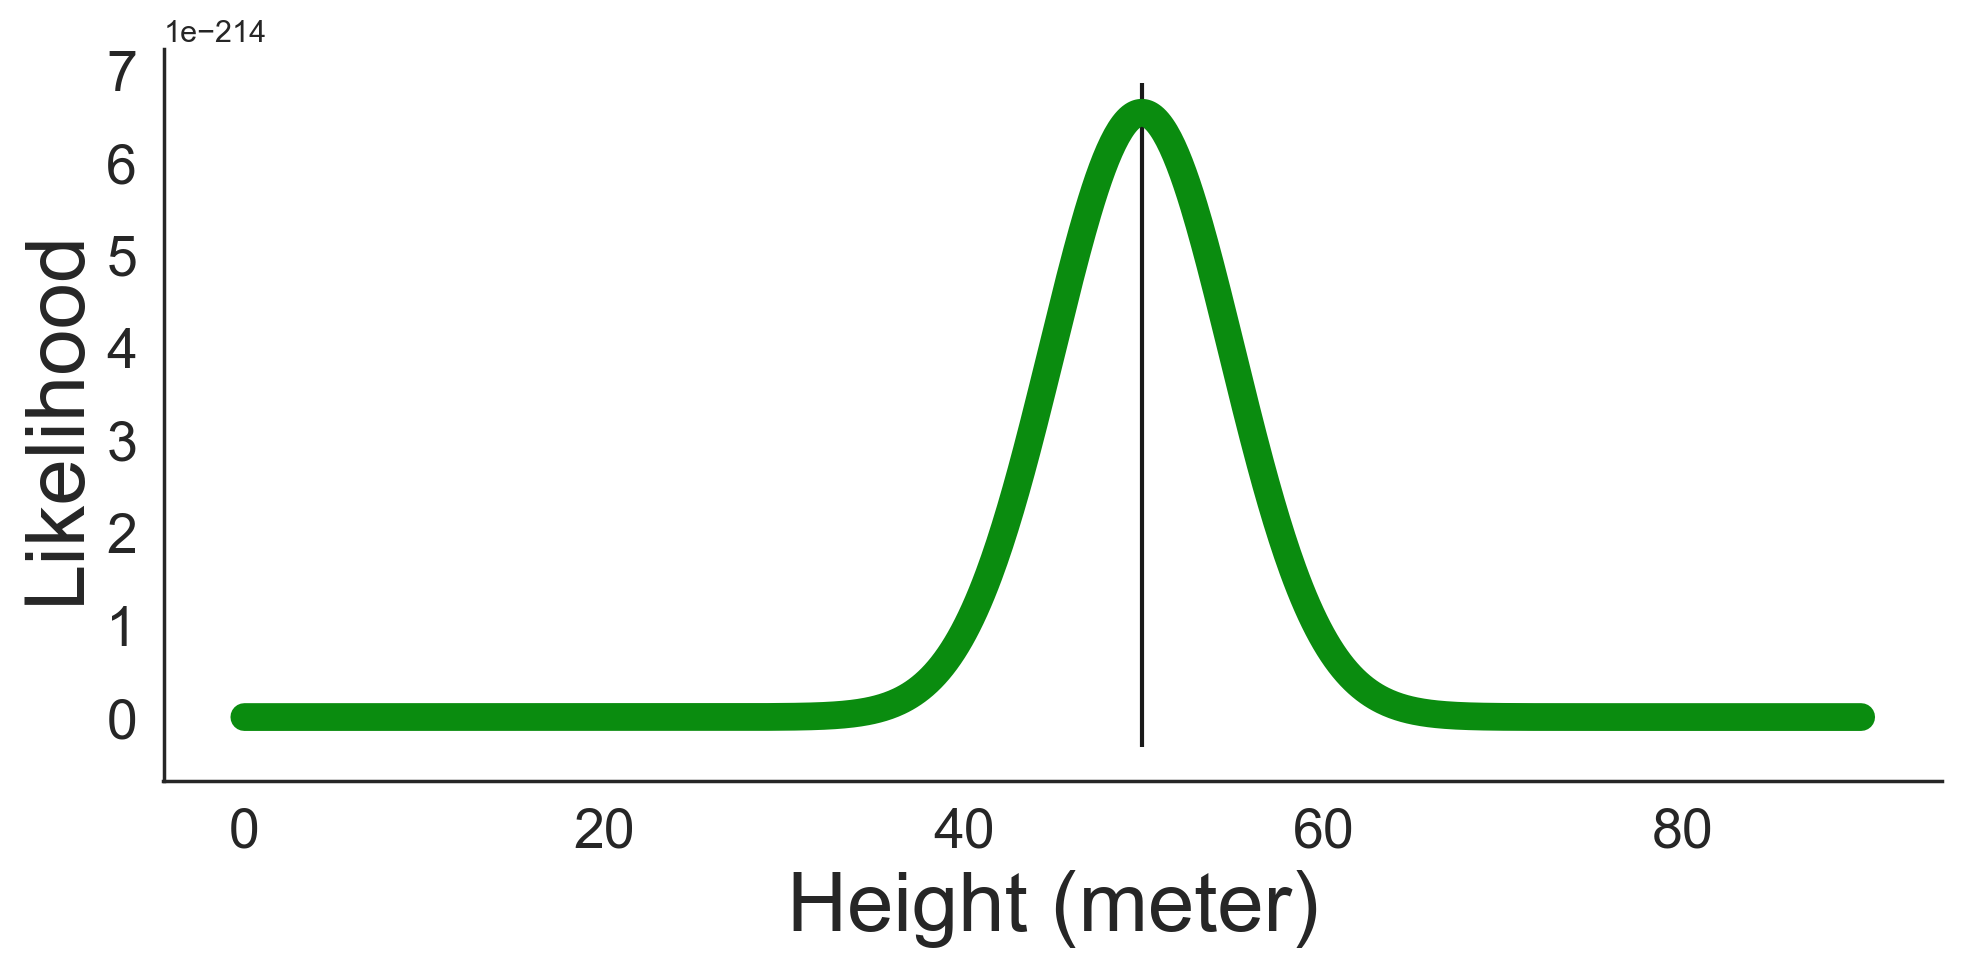

In [26]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(top=True)

color = np.array([10, 140, 15]) / 255.
ax.plot(means, likelihoods, linewidth=10, color=tuple(color))
ax.vlines(means[np.argmax(likelihoods)], *ax.get_ylim())

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Likelihood', fontsize=30)
plt.xlabel('Height (meter)', fontsize=30)
plt.tight_layout();

## Bayesian Inference

I am gonna use the likelihoods computed in previous step

### Prior #1: Normal Distirbution

In [27]:
d_mean = means[1] - means[0]
uniform_prior = np.ones(means.shape) * (1. / (means.max() - means.min())) * d_mean

In [28]:
posterior = likelihoods * uniform_prior

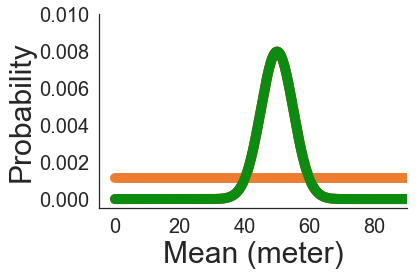

In [29]:
fig, ax = plt.subplots()
sns.despine(top=True)

# color = np.array([10, 140, 15]) / 255.
ax.plot(means, likelihoods / likelihoods.sum(), linewidth=10, color='red')

color = np.array([237, 125, 49]) / 255.
ax.plot(means, uniform_prior, linewidth=10, color=tuple(color))

color = np.array([10, 140, 15]) / 255.
ax.plot(means, posterior / posterior.sum(), linewidth=10, color=tuple(color))

plt.xlim(-5, 90)
plt.ylim(-.0005, .01)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Probability', fontsize=30)
plt.xlabel('Mean (meter)', fontsize=30)
plt.tight_layout();

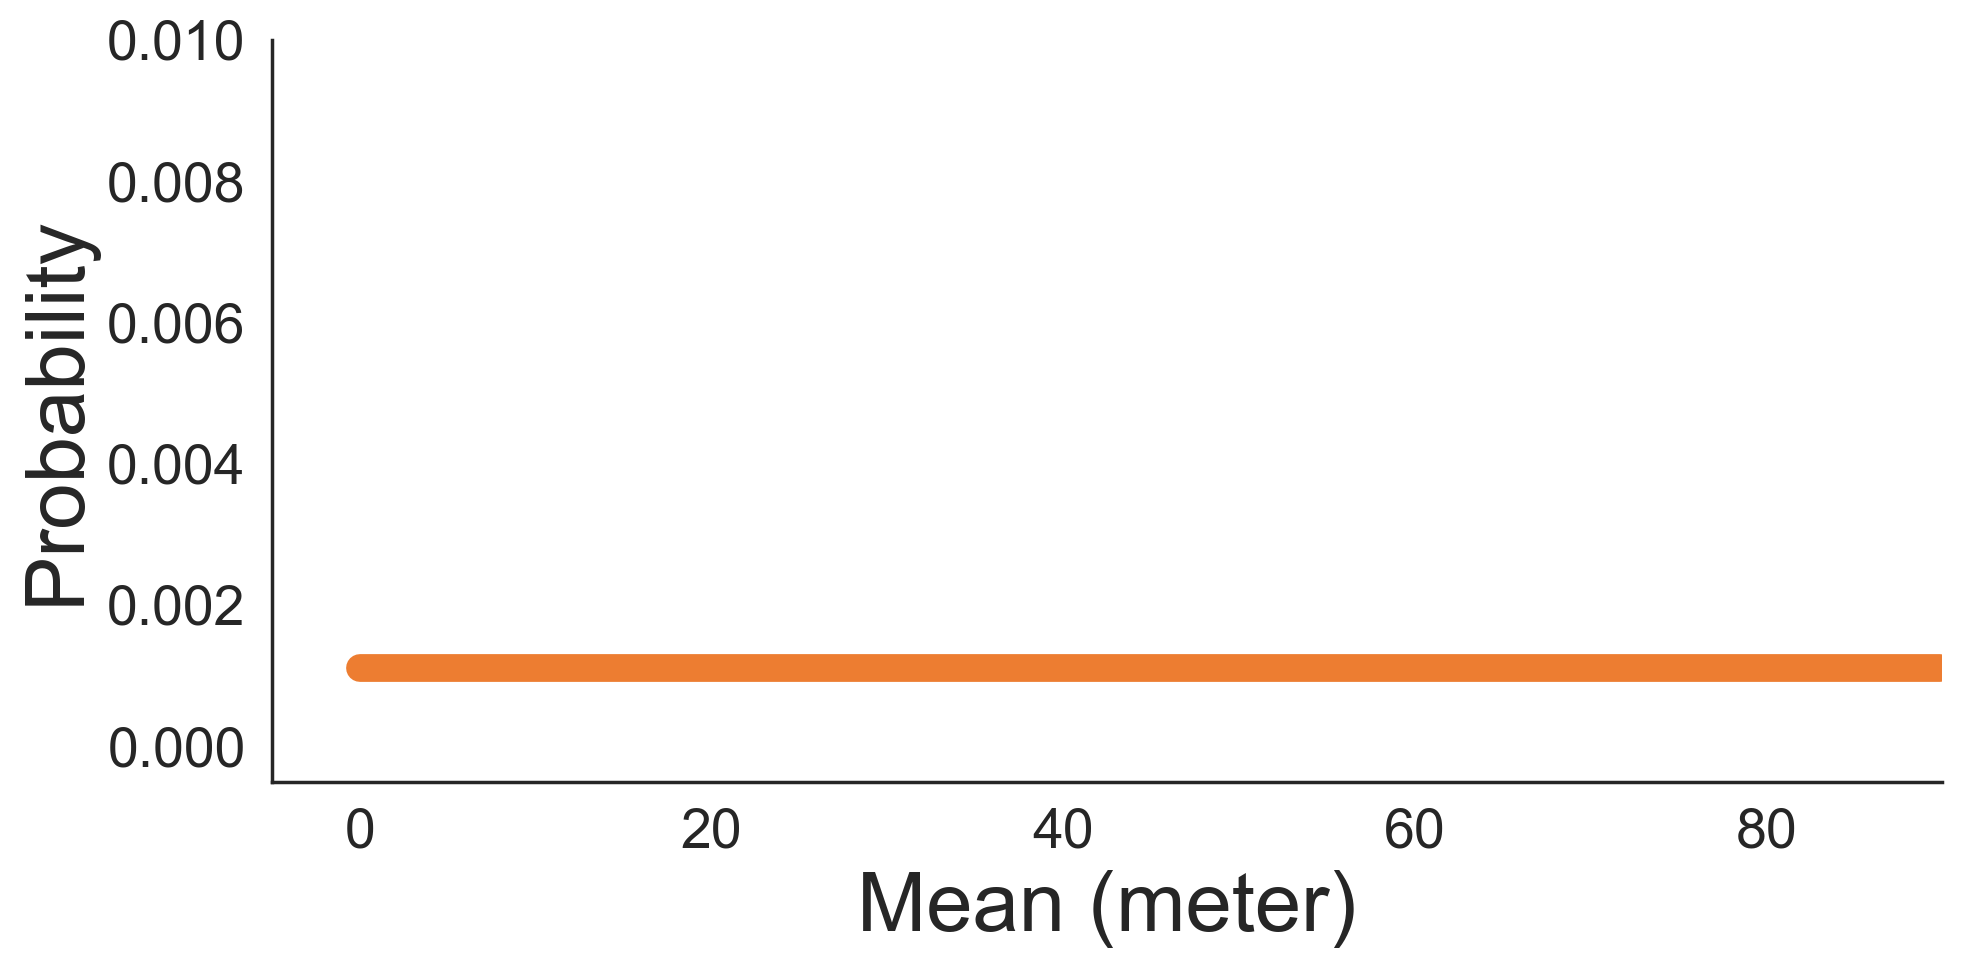

In [30]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(top=True)

color = np.array([237, 125, 49]) / 255.
ax.plot(means, uniform_prior, linewidth=10, color=tuple(color))

plt.xlim(-5, 90)
plt.ylim(-.0005, .01)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Probability', fontsize=30)
plt.xlabel('Mean (meter)', fontsize=30)
plt.tight_layout();

plt.savefig("Bayes_uniform_prior.png", transparent=True)

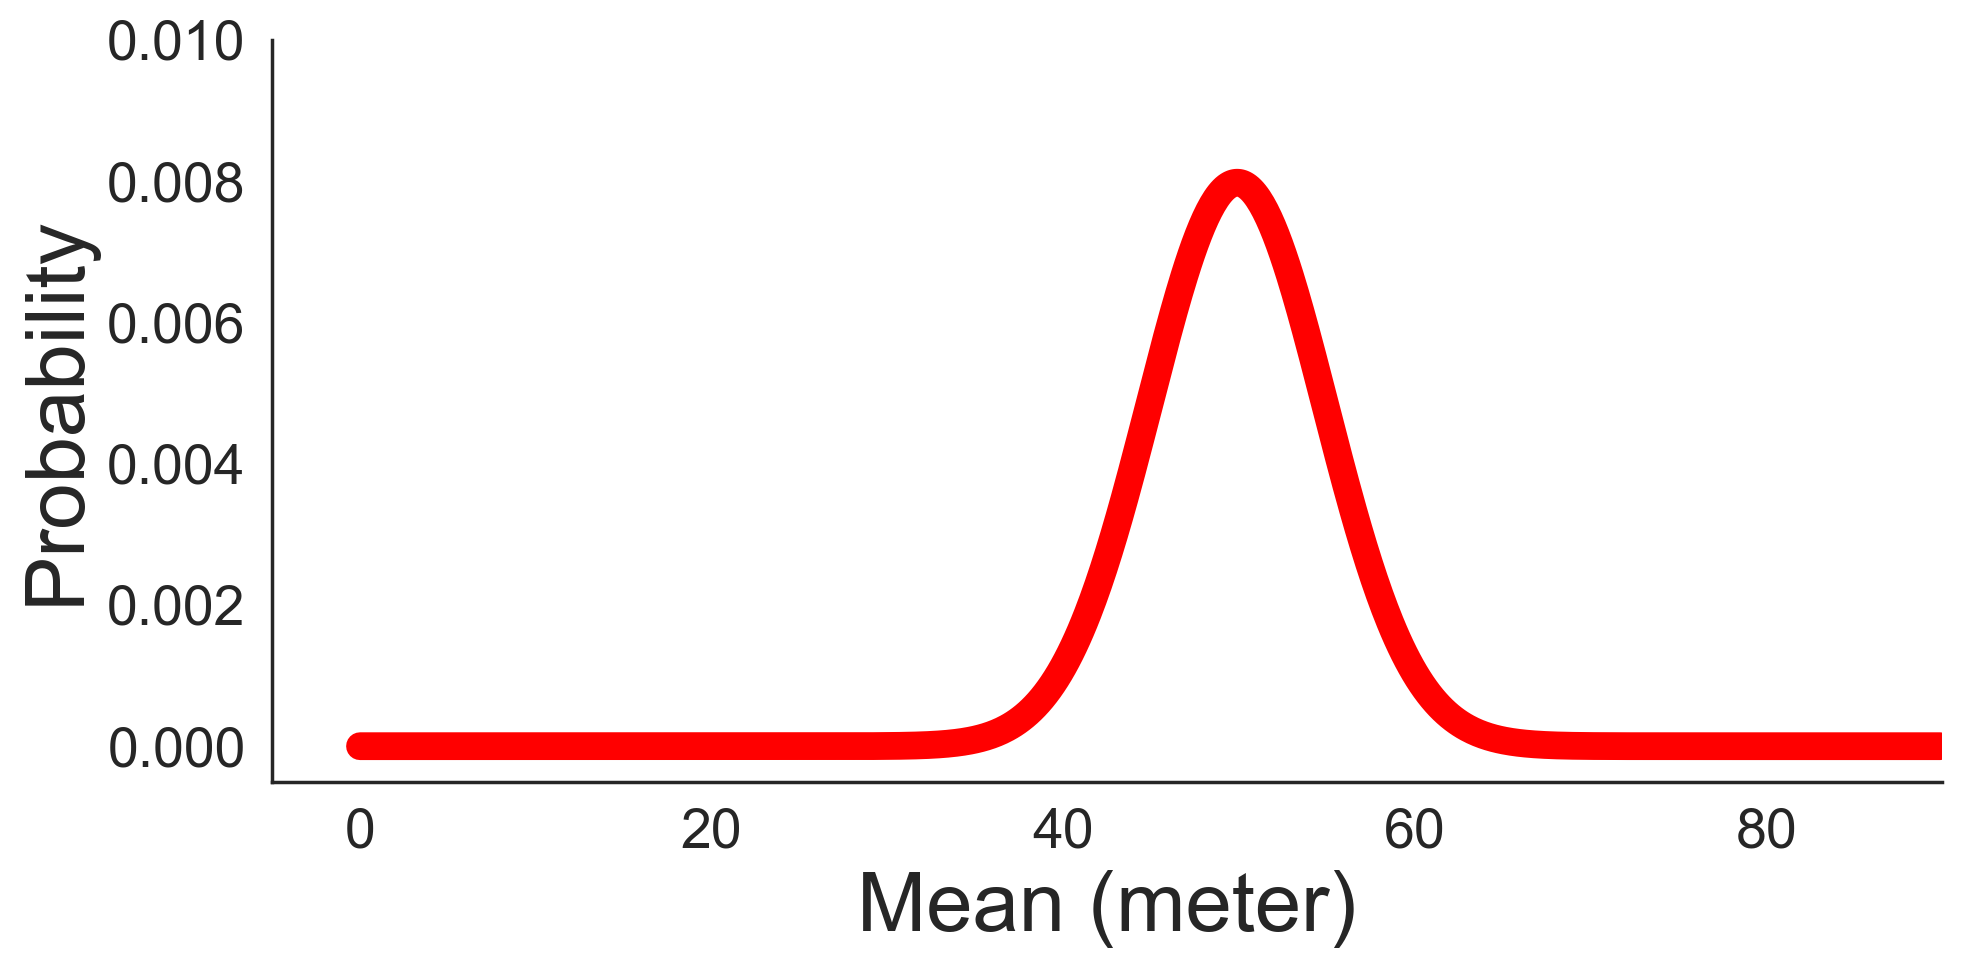

In [31]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(top=True)

# color = np.array([10, 140, 15]) / 255.
ax.plot(means, likelihoods / likelihoods.sum(), linewidth=10, color='red')

plt.xlim(-5, 90)
plt.ylim(-.0005, .01)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Probability', fontsize=30)
plt.xlabel('Mean (meter)', fontsize=30)
plt.tight_layout();

plt.savefig("Bayes_likelihood.png", transparent=True)

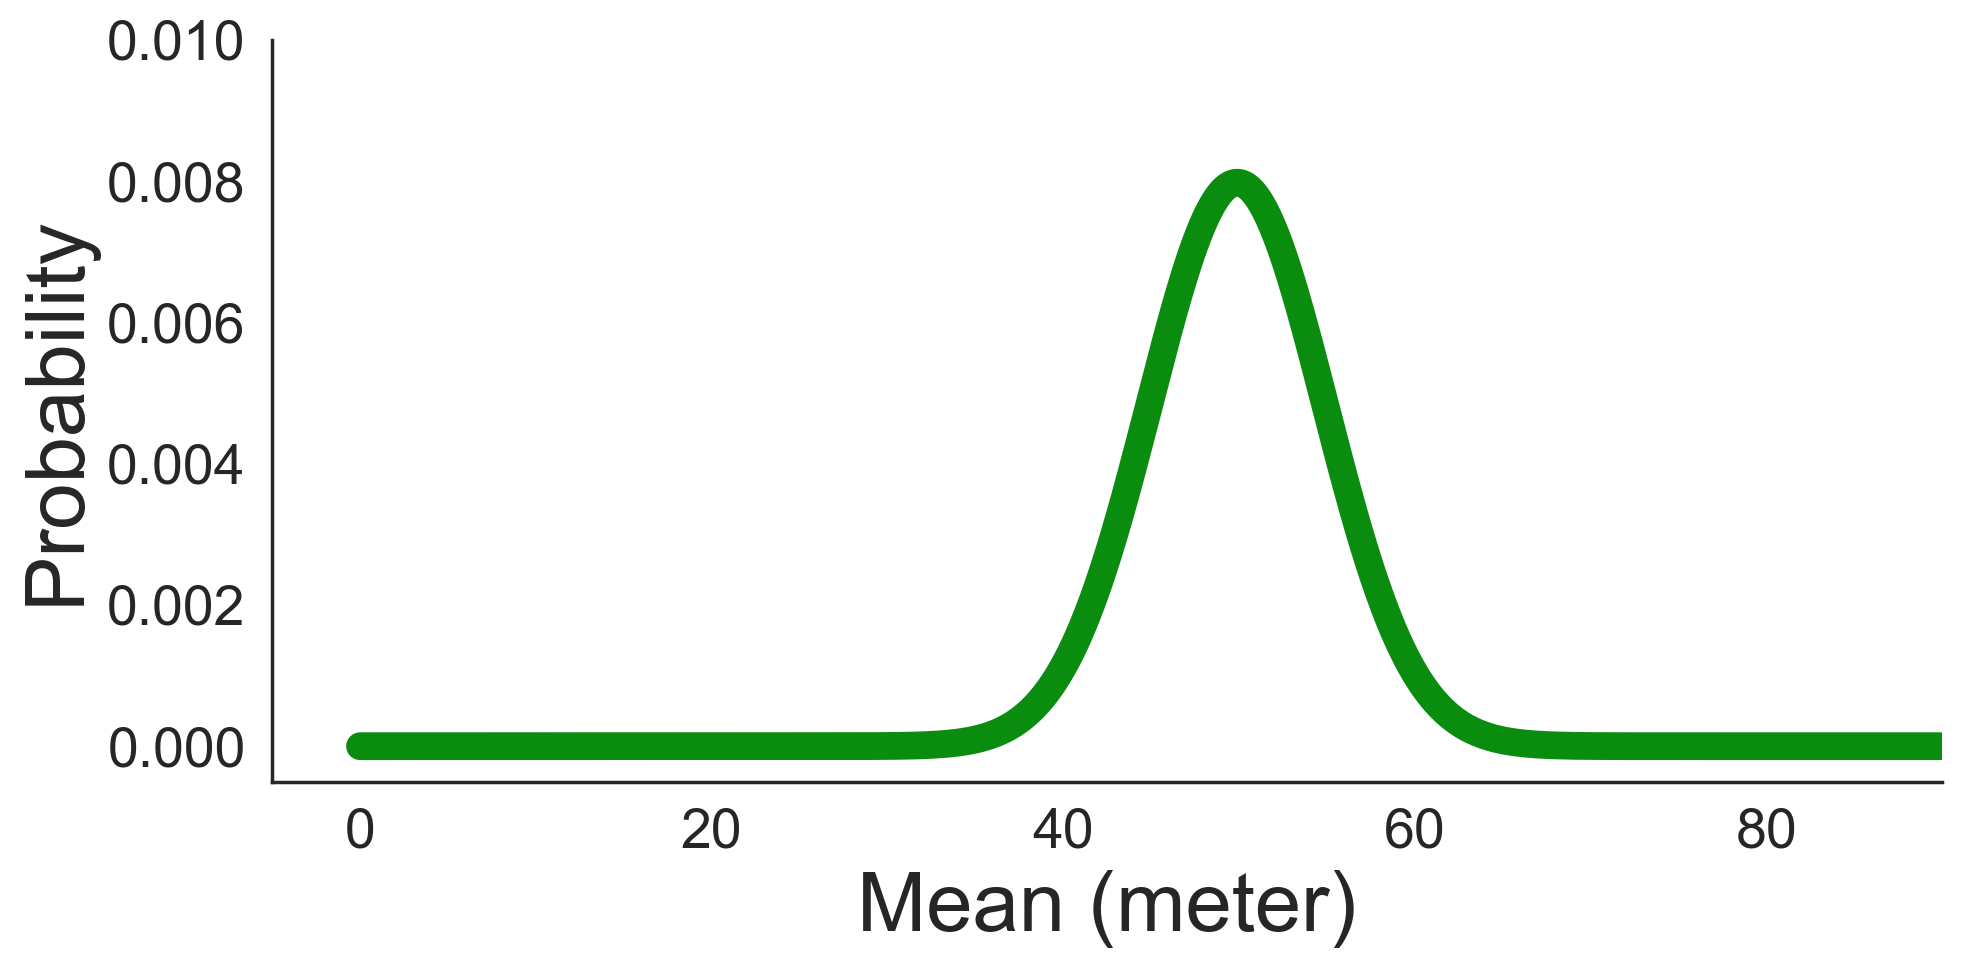

In [32]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(top=True)

color = np.array([10, 140, 15]) / 255.
ax.plot(means, posterior / posterior.sum(), linewidth=10, color=tuple(color))

plt.xlim(-5, 90)
plt.ylim(-.0005, .01)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Probability', fontsize=30)
plt.xlabel('Mean (meter)', fontsize=30)
plt.tight_layout();

plt.savefig("Bayes_uniform_posterior.png", transparent=True)

### Prior #2: Uniform distibution

In [33]:
normal_prior = scipy.stats.norm(30, 10).pdf(means)
normal_prior /= normal_prior.sum()

In [34]:
posterior = likelihoods * normal_prior

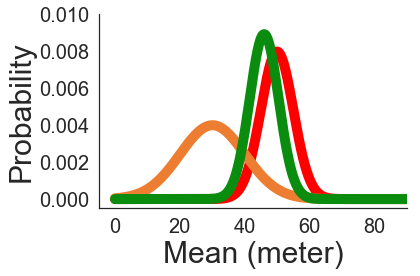

In [35]:
fig, ax = plt.subplots()
sns.despine(top=True)

# color = np.array([10, 140, 15]) / 255.
ax.plot(means, likelihoods / likelihoods.sum(), linewidth=10, color='red')

color = np.array([237, 125, 49]) / 255.
ax.plot(means, normal_prior, linewidth=10, color=tuple(color))

color = np.array([10, 140, 15]) / 255.
ax.plot(means, posterior / posterior.sum(), linewidth=10, color=tuple(color))

plt.xlim(-5, 90)
plt.ylim(-.0005, .01)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Probability', fontsize=30)
plt.xlabel('Mean (meter)', fontsize=30)
plt.tight_layout();

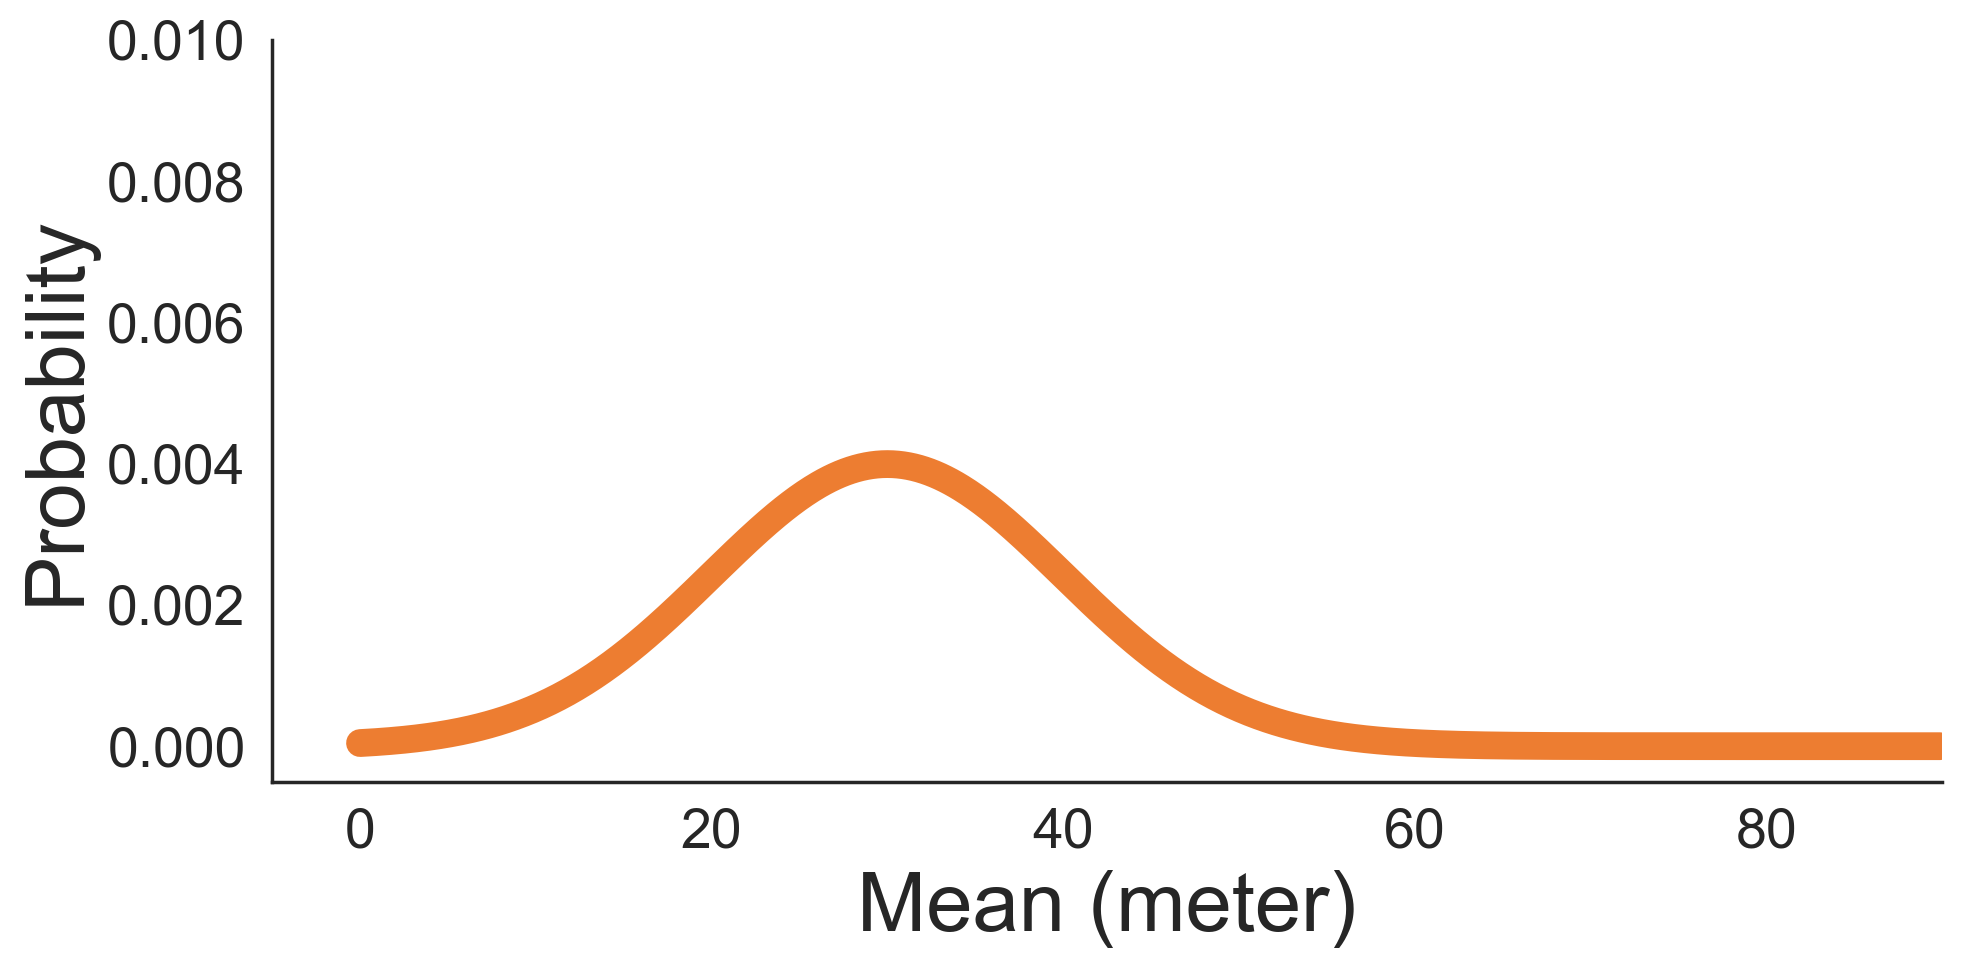

In [36]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(top=True)

color = np.array([237, 125, 49]) / 255.
ax.plot(means, normal_prior, linewidth=10, color=tuple(color))

plt.xlim(-5, 90)
plt.ylim(-.0005, .01)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Probability', fontsize=30)
plt.xlabel('Mean (meter)', fontsize=30)
plt.tight_layout();

plt.savefig("Bayes_normal_prior.png", transparent=True)

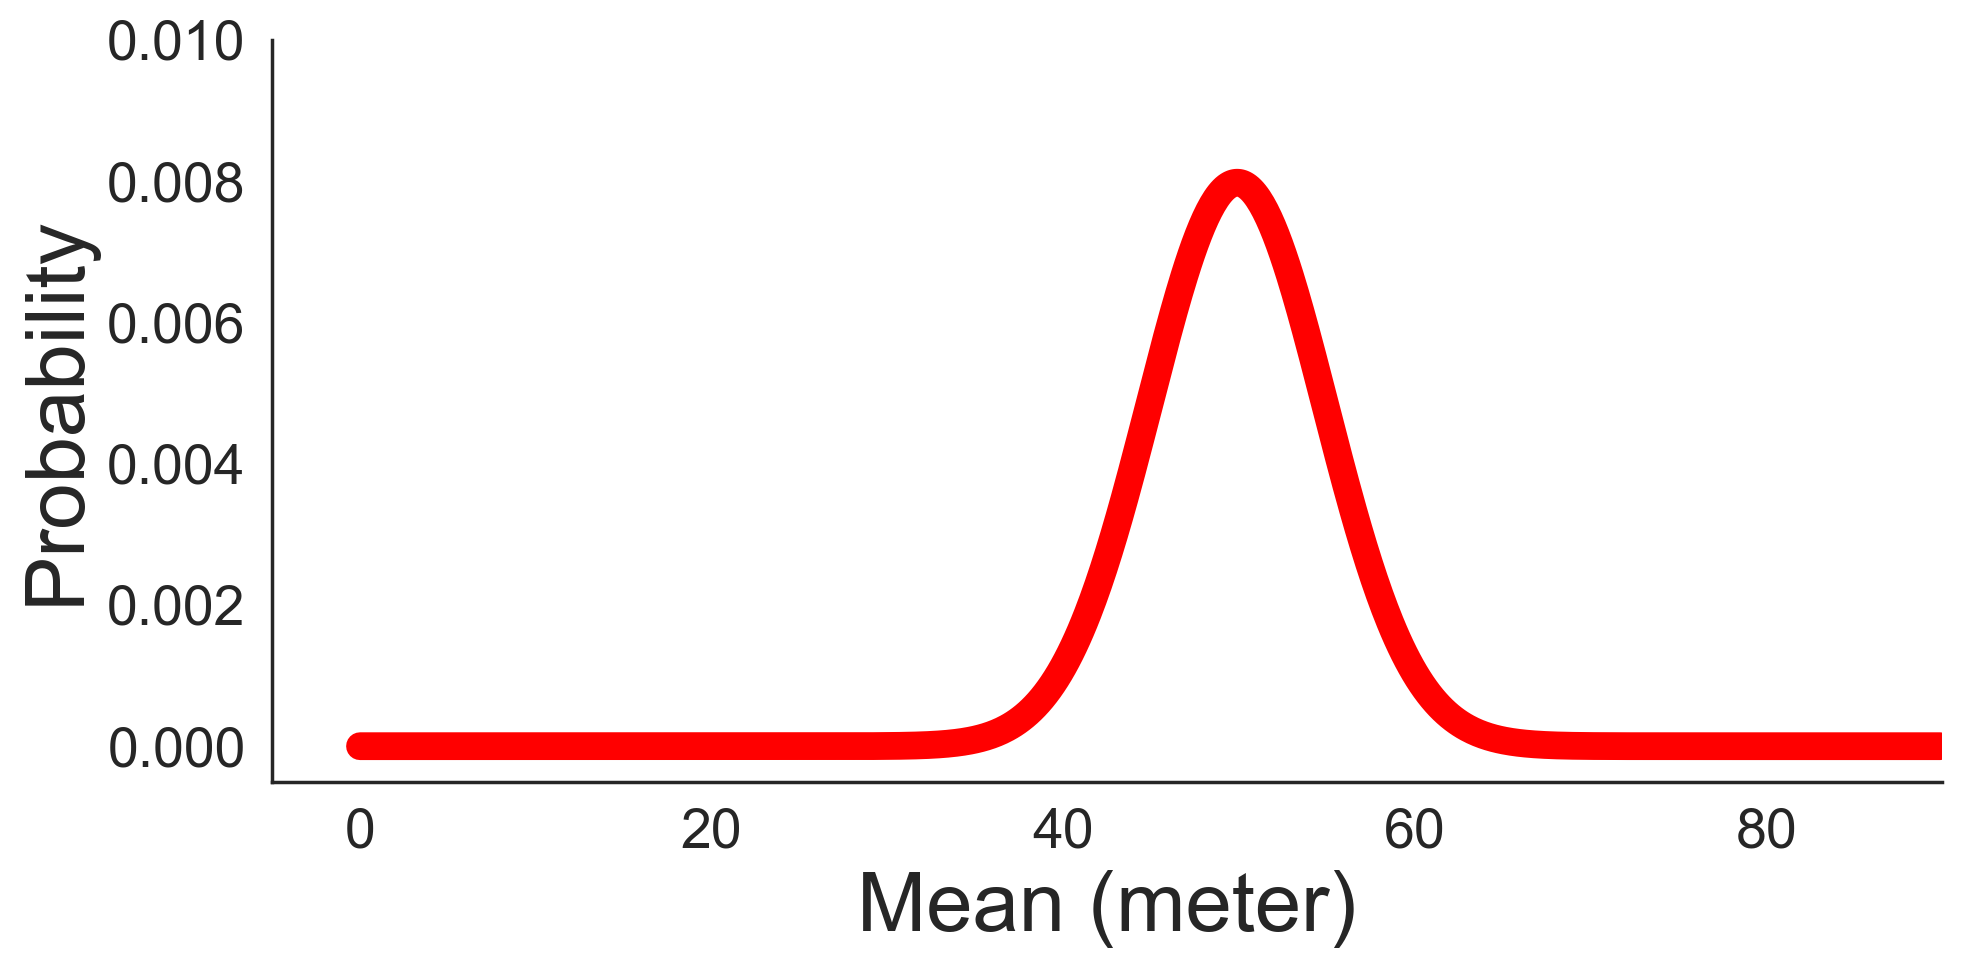

In [37]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(top=True)

# color = np.array([10, 140, 15]) / 255.
ax.plot(means, likelihoods / likelihoods.sum(), linewidth=10, color='red')

plt.xlim(-5, 90)
plt.ylim(-.0005, .01)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Probability', fontsize=30)
plt.xlabel('Mean (meter)', fontsize=30)
plt.tight_layout();

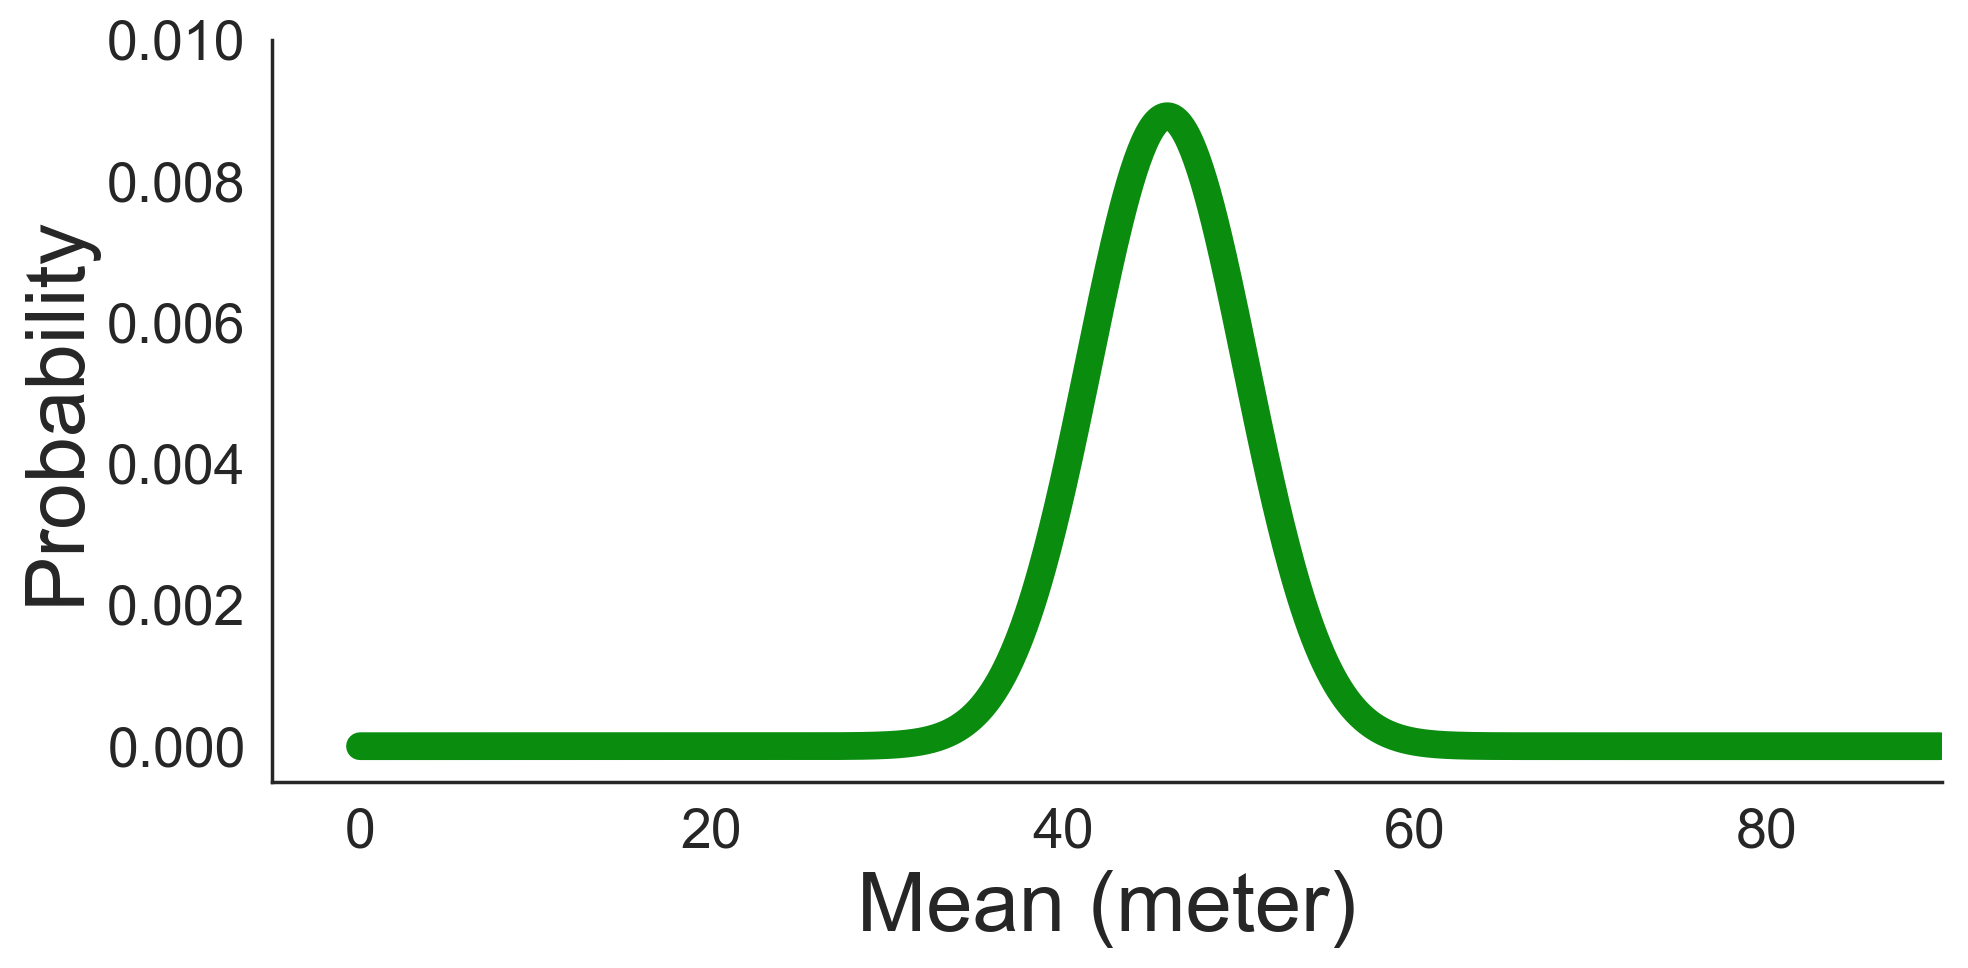

In [38]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(top=True)

color = np.array([10, 140, 15]) / 255.
ax.plot(means, posterior / posterior.sum(), linewidth=10, color=tuple(color))

plt.xlim(-5, 90)
plt.ylim(-.0005, .01)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Probability', fontsize=30)
plt.xlabel('Mean (meter)', fontsize=30)
plt.tight_layout();

plt.savefig("Bayes_normal_posterior.png", transparent=True)

### Prior #3: Skewed normal dsitibution

In [39]:
skewed_prior = scipy.stats.skewnorm.pdf(means, 5, loc=10, scale=8)
skewed_prior /= skewed_prior.sum()

In [40]:
posterior = likelihoods * skewed_prior

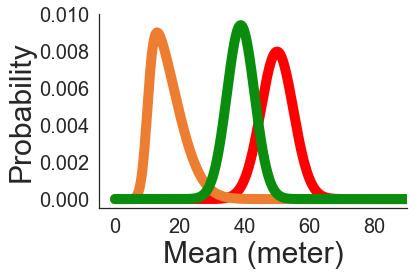

In [41]:
fig, ax = plt.subplots()
sns.despine(top=True)

# color = np.array([10, 140, 15]) / 255.
ax.plot(means, likelihoods / likelihoods.sum(), linewidth=10, color='red')

color = np.array([237, 125, 49]) / 255.
ax.plot(means, skewed_prior, linewidth=10, color=tuple(color))

color = np.array([10, 140, 15]) / 255.
ax.plot(means, posterior / posterior.sum(), linewidth=10, color=tuple(color))

plt.xlim(-5, 90)
plt.ylim(-.0005, .01)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Probability', fontsize=30)
plt.xlabel('Mean (meter)', fontsize=30)
plt.tight_layout();

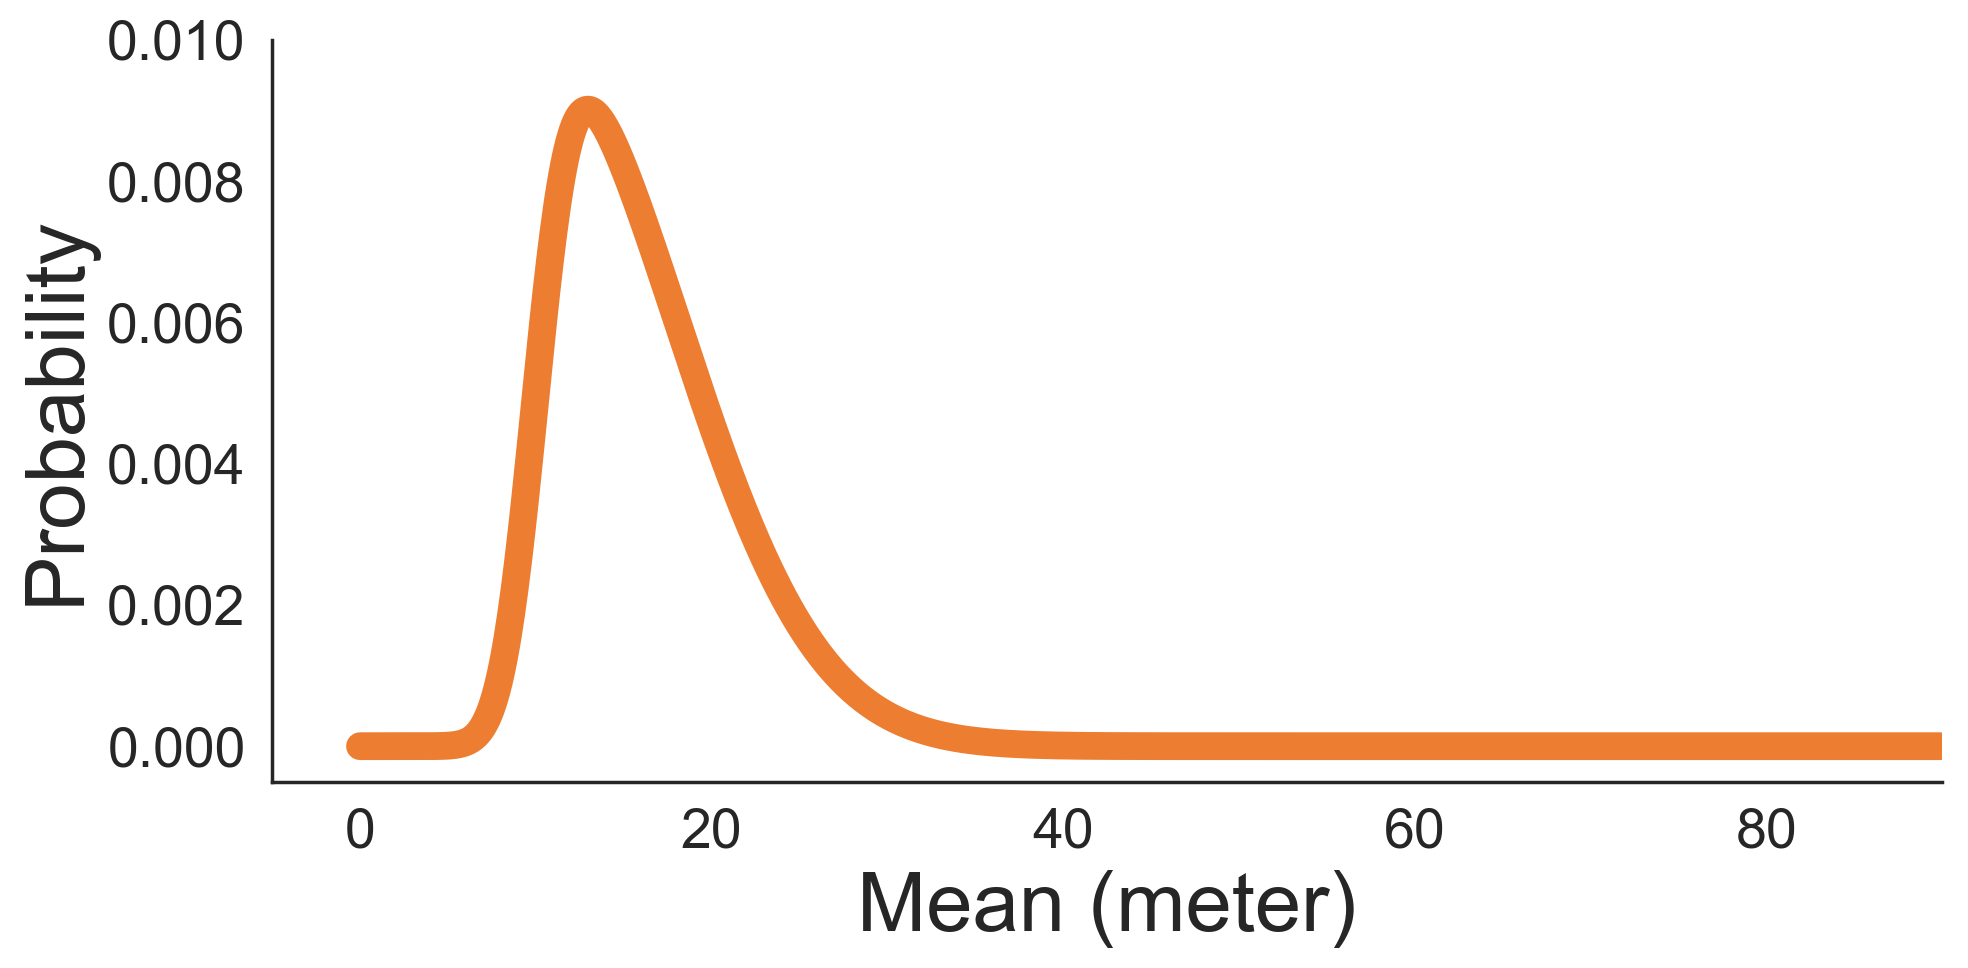

In [42]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(top=True)

color = np.array([237, 125, 49]) / 255.
ax.plot(means, skewed_prior, linewidth=10, color=tuple(color))

plt.xlim(-5, 90)
plt.ylim(-.0005, .01)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Probability', fontsize=30)
plt.xlabel('Mean (meter)', fontsize=30)
plt.tight_layout();

plt.savefig("Bayes_skewed_prior.png", transparent=True)

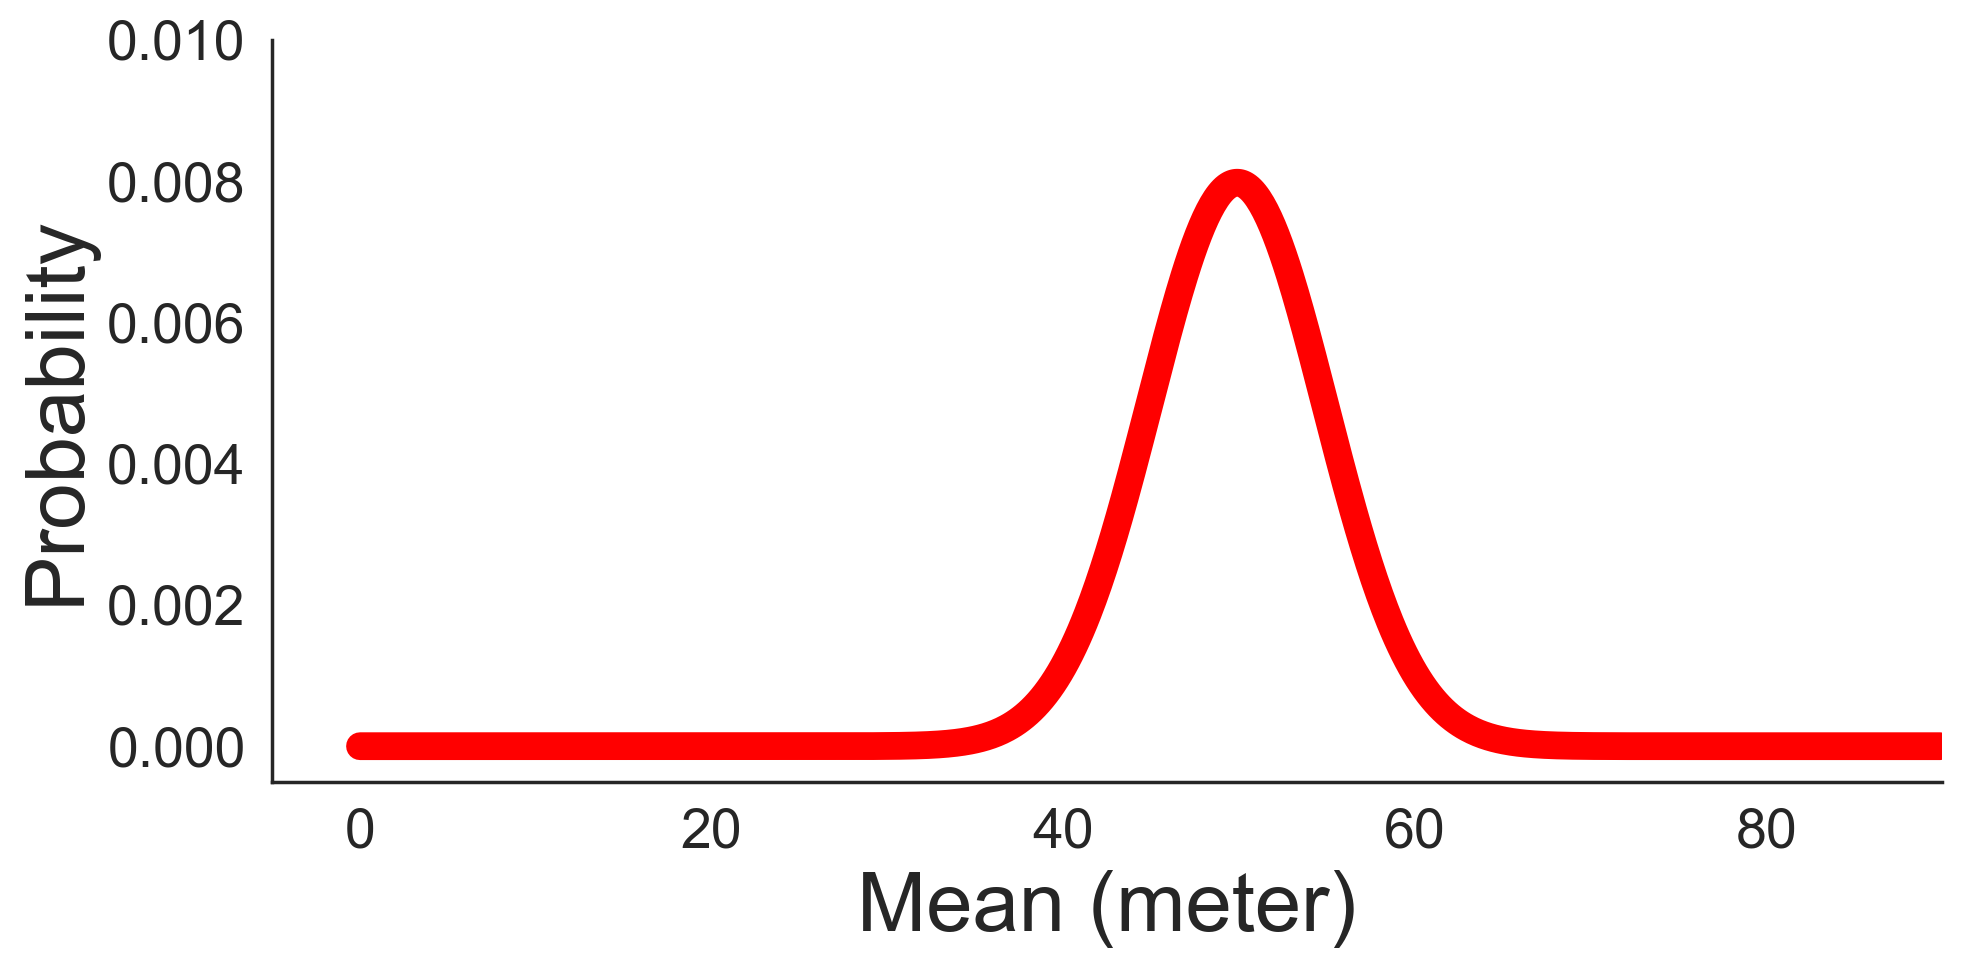

In [43]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(top=True)

# color = np.array([10, 140, 15]) / 255.
ax.plot(means, likelihoods / likelihoods.sum(), linewidth=10, color='red')

plt.xlim(-5, 90)
plt.ylim(-.0005, .01)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Probability', fontsize=30)
plt.xlabel('Mean (meter)', fontsize=30)
plt.tight_layout();

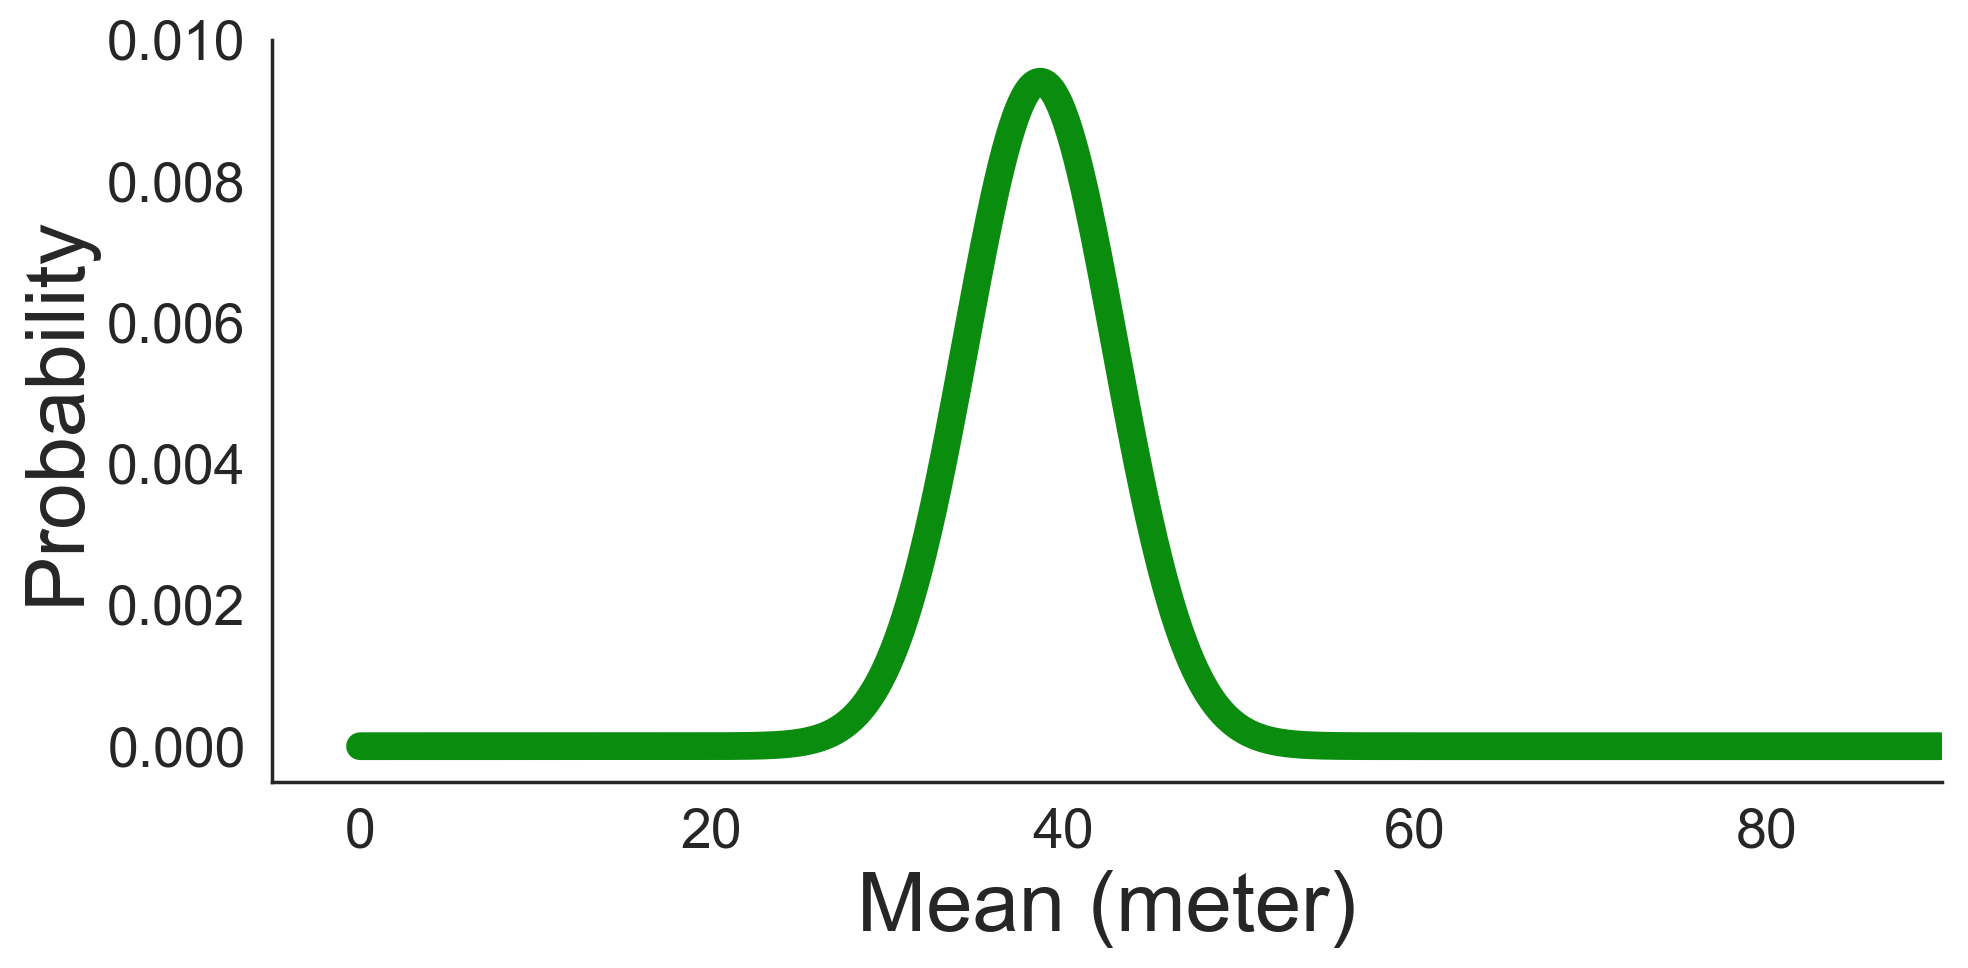

In [44]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(top=True)

color = np.array([10, 140, 15]) / 255.
ax.plot(means, posterior / posterior.sum(), linewidth=10, color=tuple(color))

plt.xlim(-5, 90)
plt.ylim(-.0005, .01)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Probability', fontsize=30)
plt.xlabel('Mean (meter)', fontsize=30)
plt.tight_layout();

plt.savefig("Bayes_skewed_posterior.png", transparent=True)

# Notebook figures

## Probabilit distribution

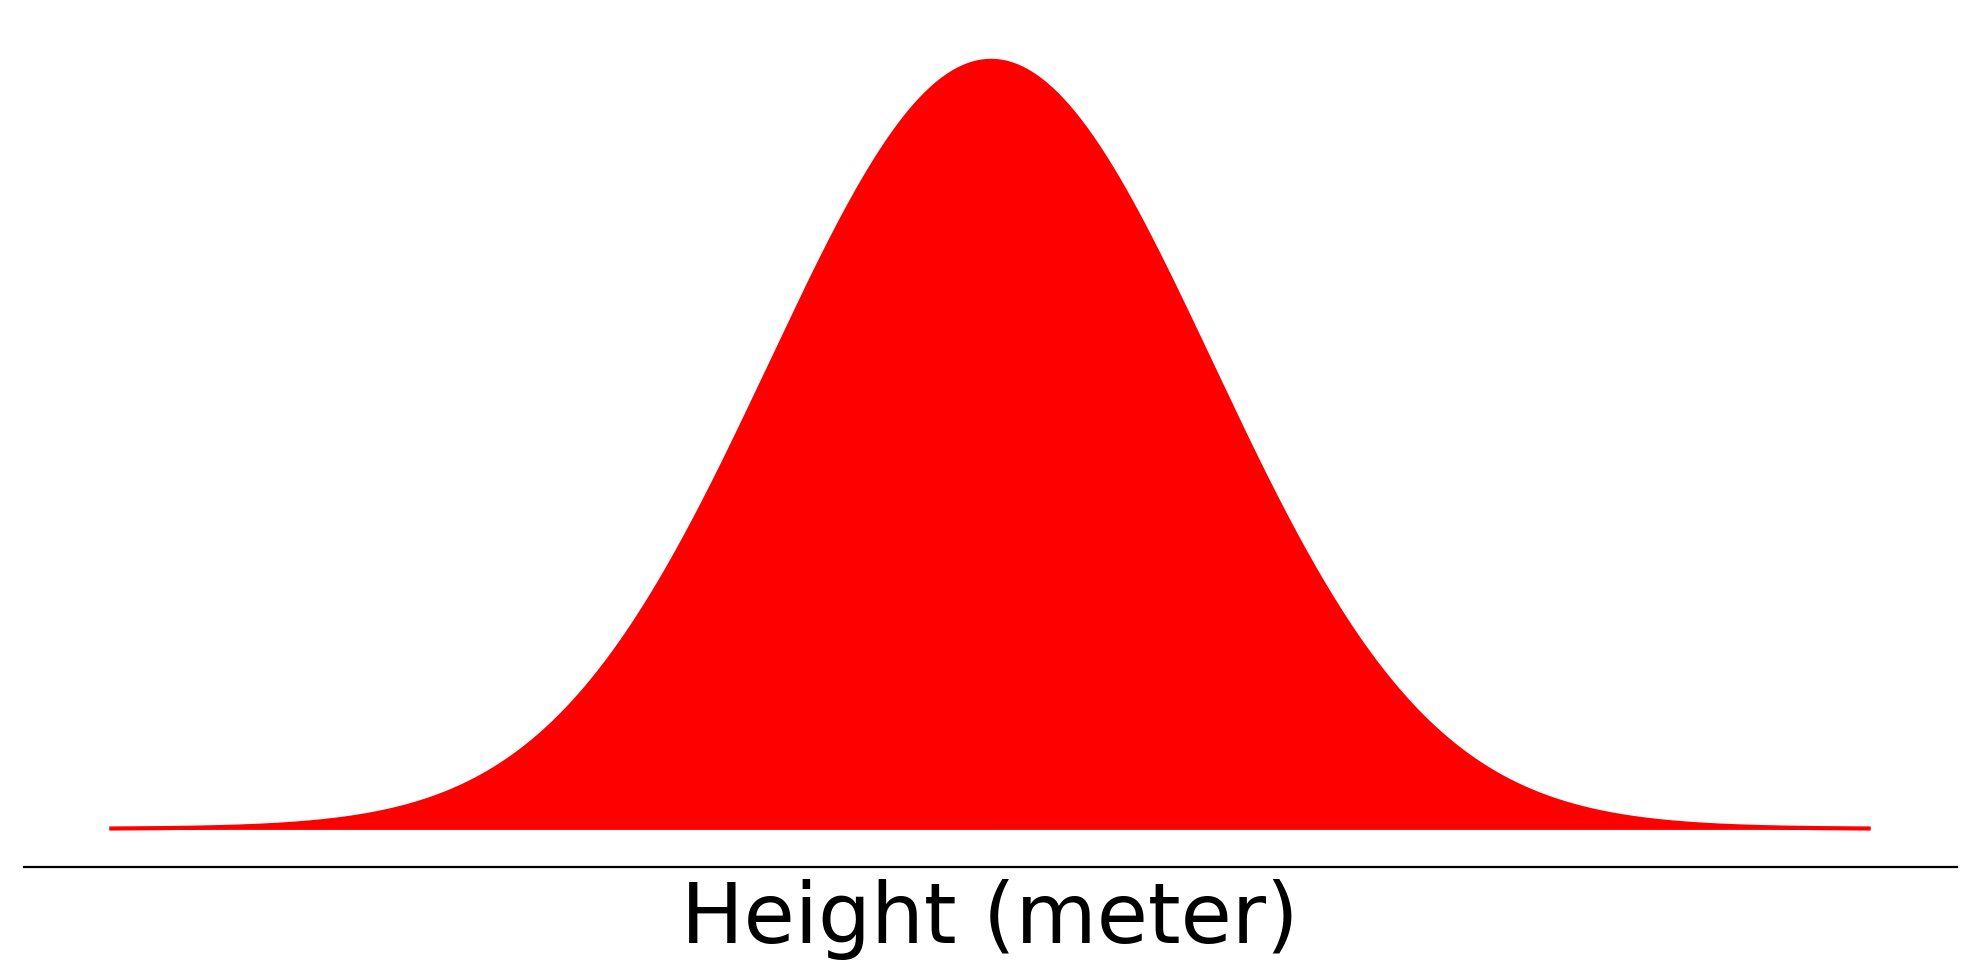

In [38]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(left=True)

x = np.arange(-4, 4, .01)
prob_x = scipy.stats.norm(0, 1).pdf(x)
# color = np.array([10, 140, 15]) / 255.
plt.plot(x, prob_x, color='r')
plt.fill(x, prob_x, color='r')
plt.yticks([])
plt.xticks([])
plt.xlabel("Height (meter)", fontsize=30)
plt.tight_layout();

plt.savefig("notebook_population_dist.png", transparent=True)

## Half normal distribution

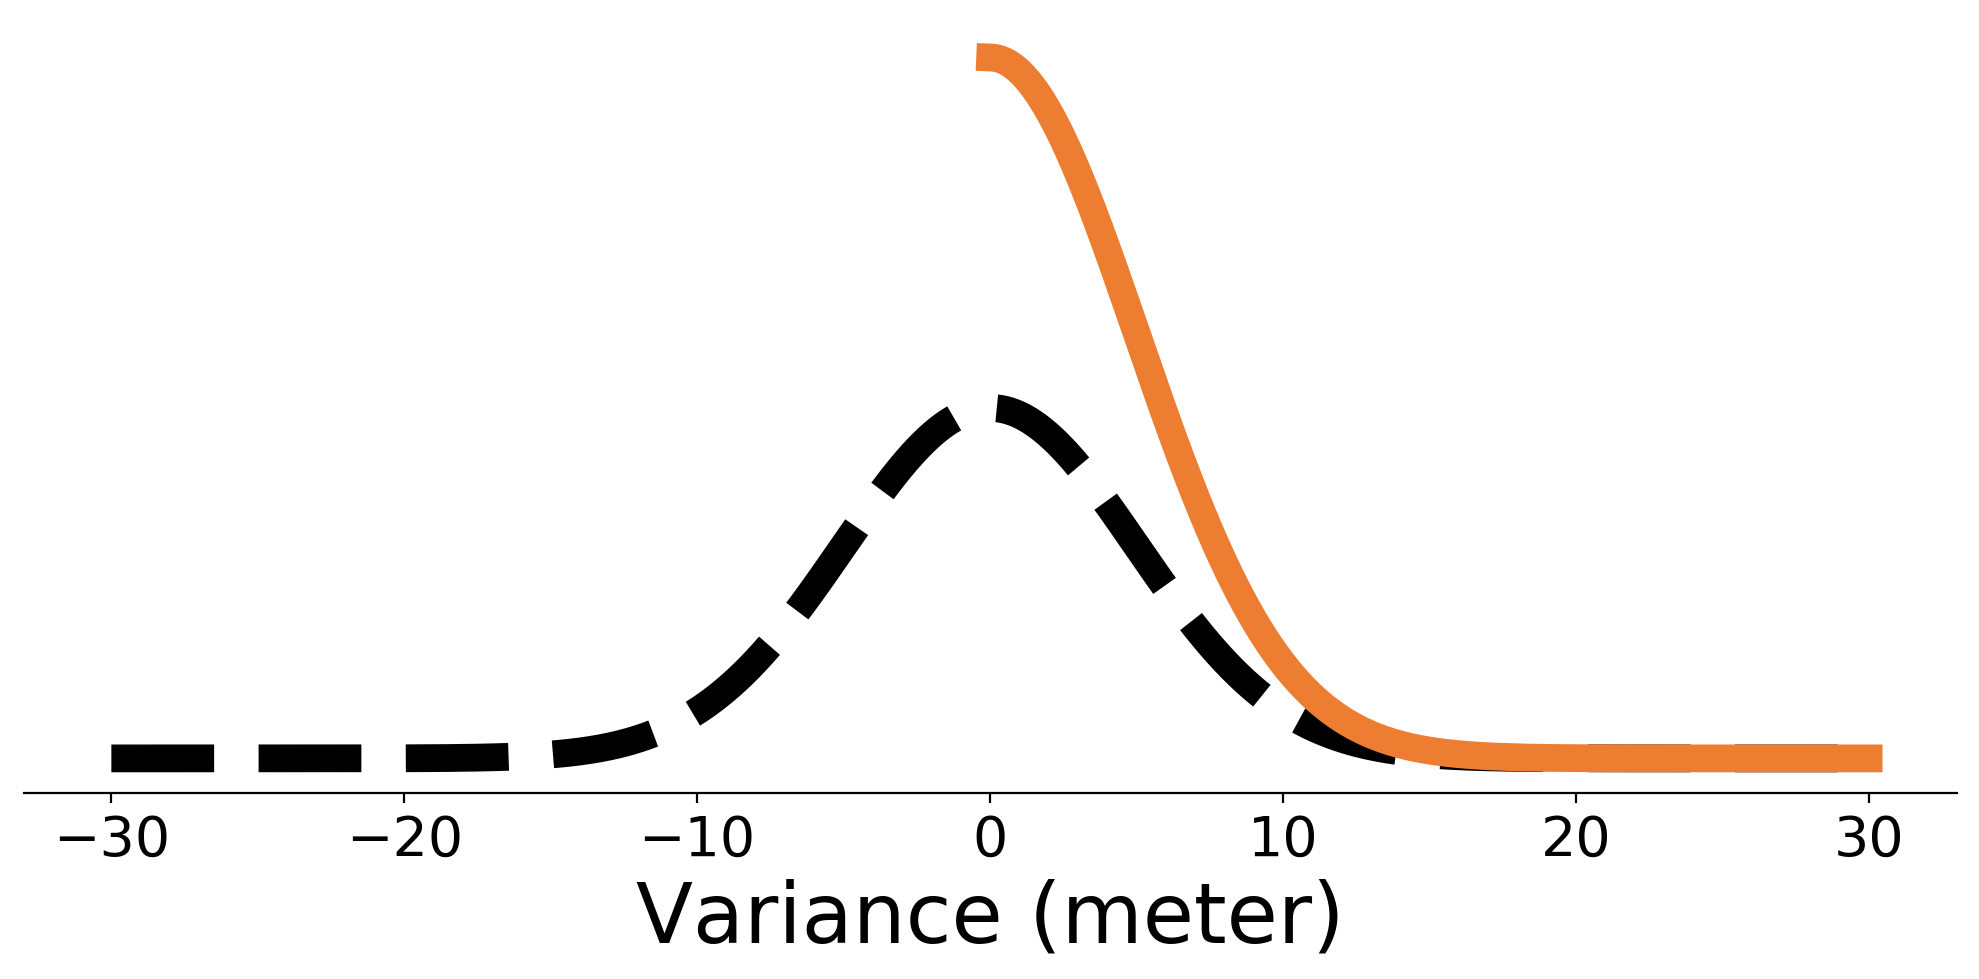

In [40]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(left=True)

x = np.arange(-30, 30, .01)
prob_x = scipy.stats.norm(0, 5).pdf(x)
plt.plot(x, prob_x, linewidth=10, color='k', linestyle='dashed')
color = np.array([237, 125, 49]) / 255.
plt.plot(x[x >= 0], 2*prob_x[x >= 0], linewidth=10, color=tuple(color))
# plt.fill(x, prob_x, color='r')
plt.yticks([])
plt.xticks(fontsize=20)
plt.xlabel("Variance (meter)", fontsize=30)
plt.tight_layout();

plt.savefig("notebook_variance_prior.png", transparent=True)

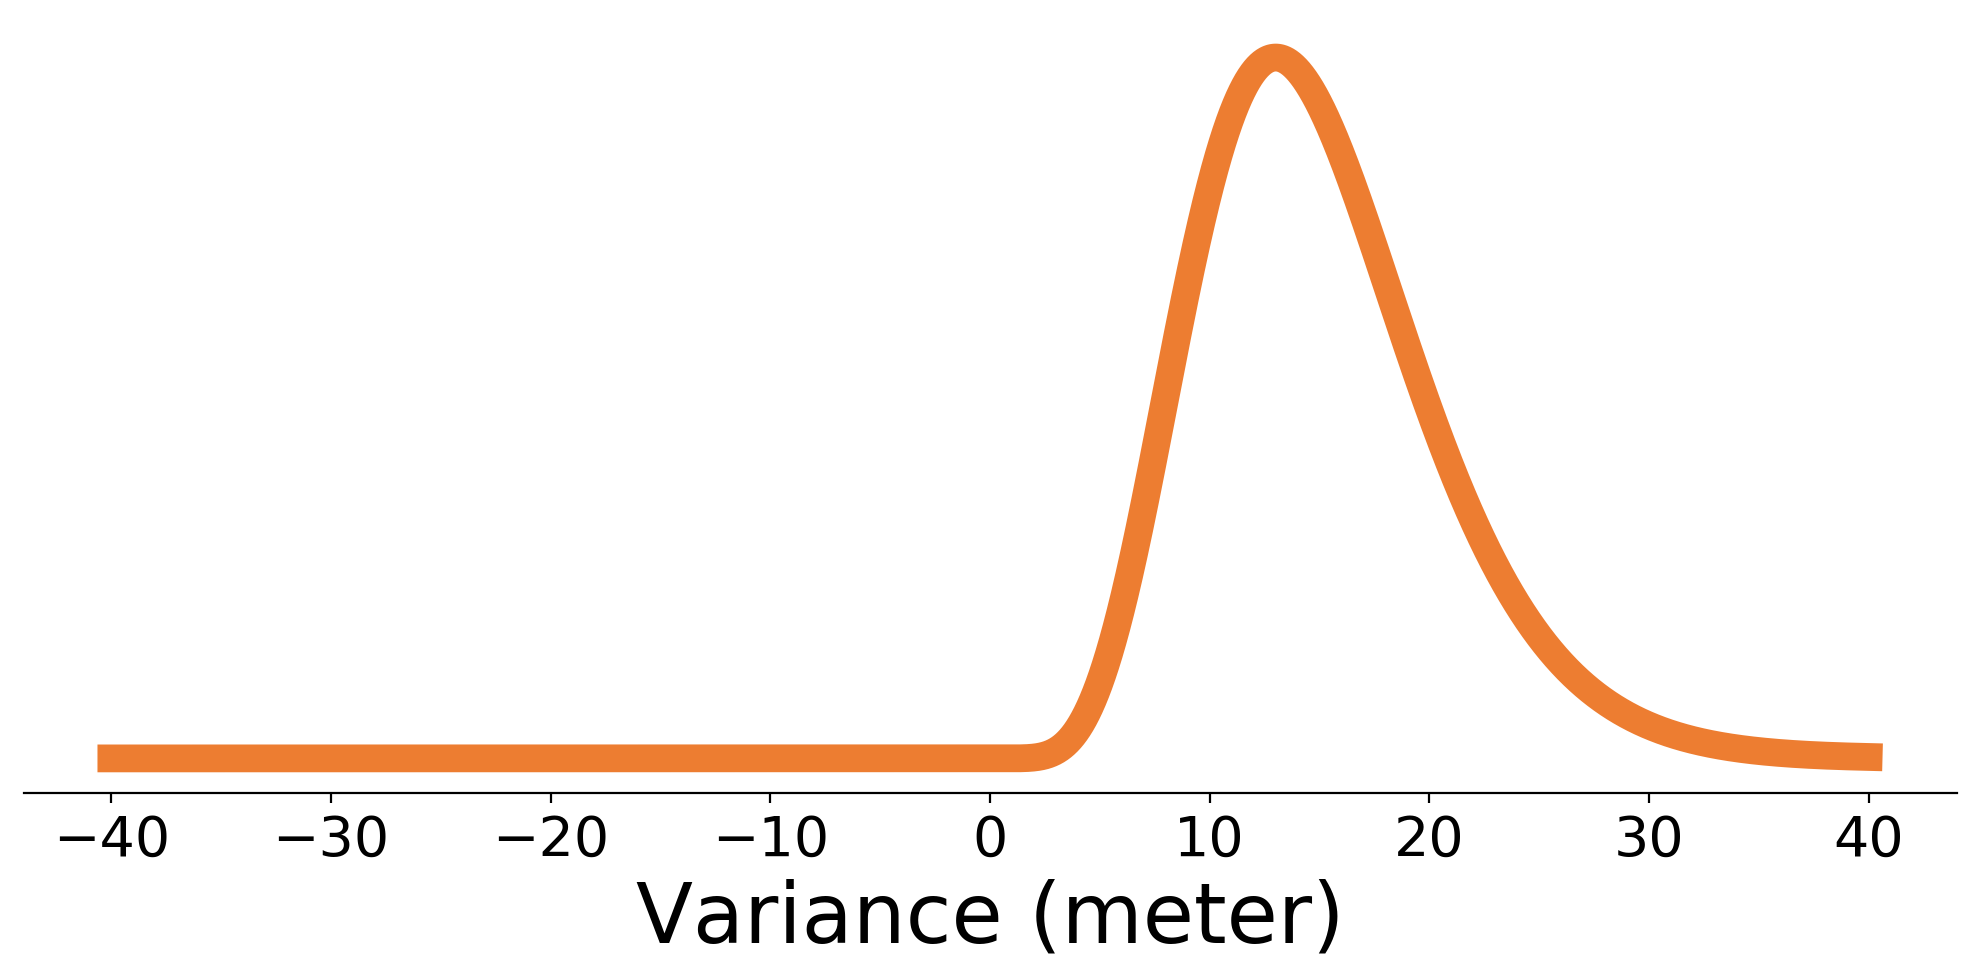

In [57]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(left=True)

x = np.arange(-40, 40, .01)
prob_x = scipy.stats.chi2(15, 0).pdf(x)
# plt.plot(x, prob_x, linewidth=10, color='k', linestyle='dashed')
color = np.array([237, 125, 49]) / 255.
plt.plot(x, prob_x, linewidth=10, color=tuple(color))
# plt.fill(x, prob_x, color='r')
plt.yticks([])
plt.xticks(fontsize=20)
plt.xlabel("Variance (meter)", fontsize=30)
plt.tight_layout();

plt.savefig("notebook_variance_chi2_prior.png", transparent=True)

## Shifted normal prior for the mean

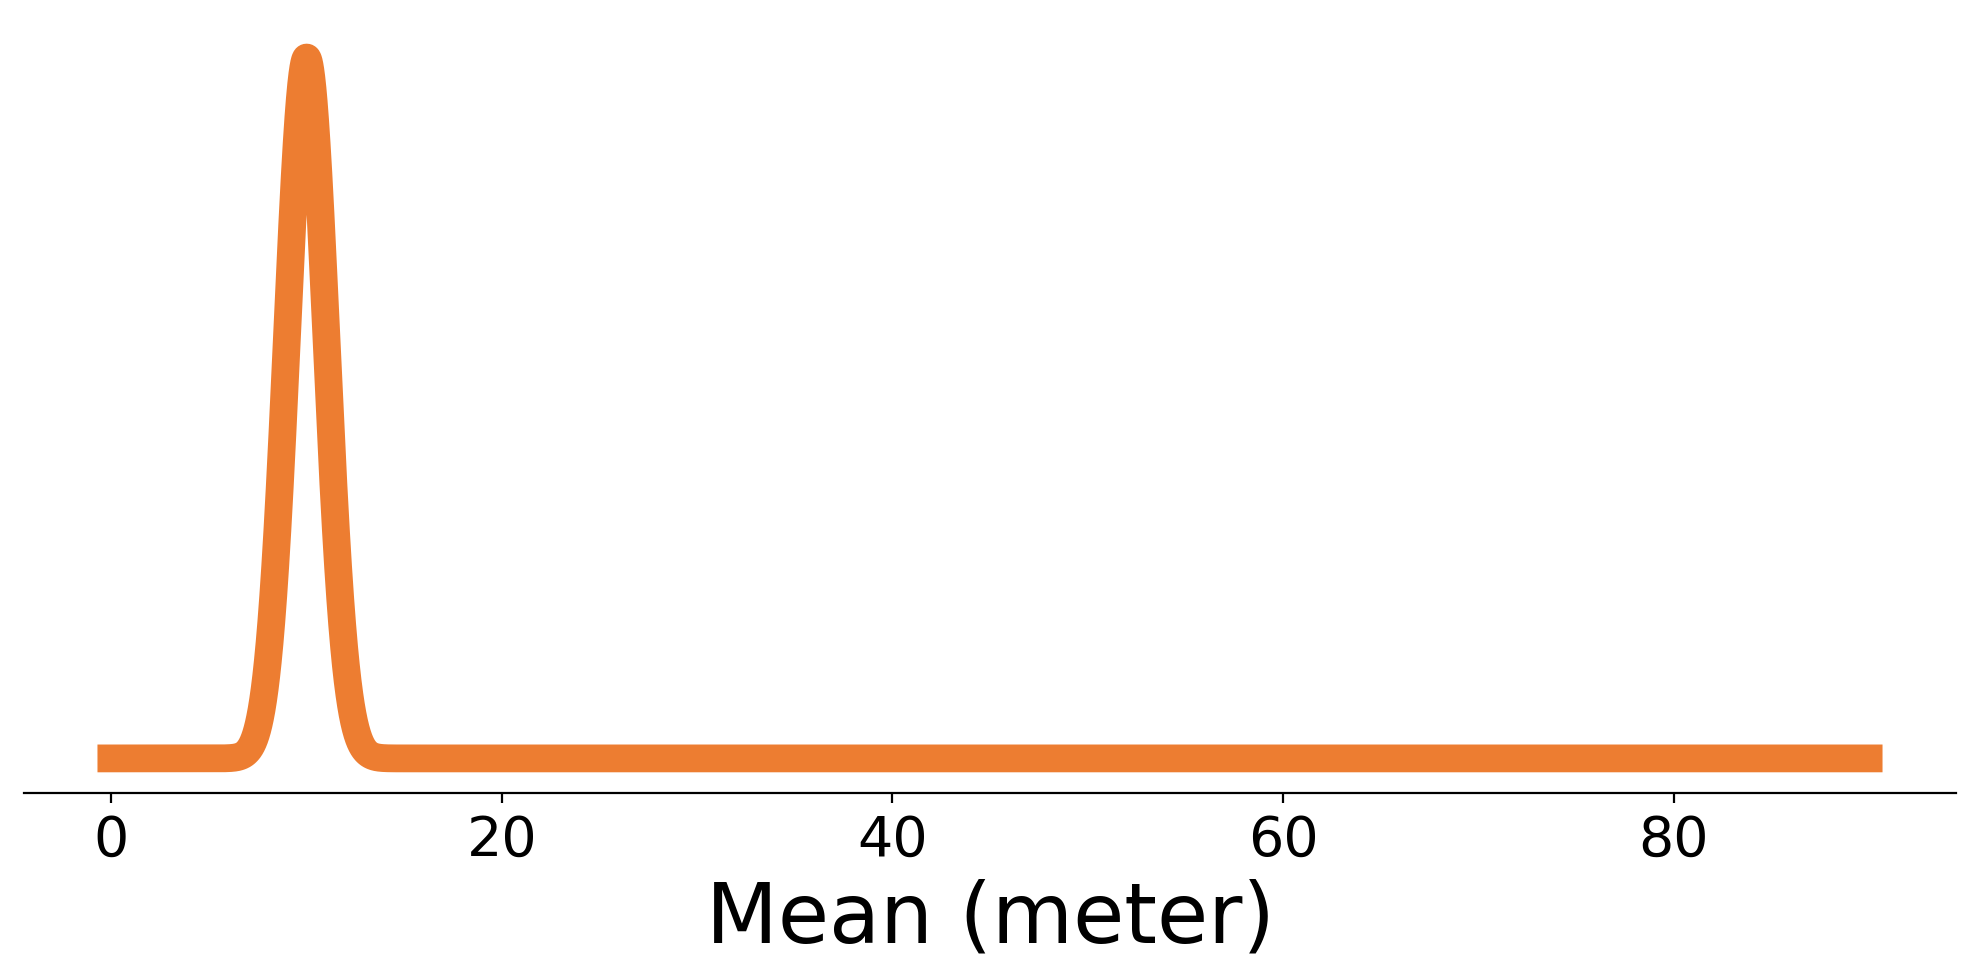

In [66]:
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
sns.despine(left=True)

x = np.arange(0, 90, .01)
prob_x = scipy.stats.norm(10, 1).pdf(x)

color = np.array([237, 125, 49]) / 255.
ax.plot(x, prob_x, linewidth=10, color=tuple(color))

# plt.xlim(-5, 90)
# plt.ylim(-.0005, .01)
# plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks([])
plt.xlabel('Mean (meter)', fontsize=30)
plt.tight_layout();

plt.savefig("variance_shifted_prio.png", transparent=True)